In [0]:
#MOUNTING THE GOOGLE DRIVE
from google.colab import  drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#LOADING BASIC DEPENDENCIES 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#DRIVE LOCATION FOR THE DATASET 
loc= '/content/gdrive/My Drive/NLP Case Study/use_case_data.json'

In [0]:
#LOADING THE DATASET, THIS IS CONVERTED DATASET WITH FEATURE ENGINEERING 
data=pd.read_csv("/content/gdrive/My Drive/NLP Case Study/CASE_DATA.csv")


FileNotFoundError: ignored

In [0]:
#CHECKING THE SAMPLE 5 INSTANCES FROM TOP
data.head()

,Listing_ID,Candidate_ID,Listing_Content,ATS_Status,Listing_Longitude,Listing_Latitude,Candidate_Longitude,Candidate_Latitude,Listing_Jobtitle,CV_Experience,Listing_Skills,CV_Skills,CV_Highest_Education
0,00250608015BFE1CA028A1D6268179E2108E96CA8C1785...,12A643CFAB1ABD612796BAEEE9EAF2765C796898BC599C...,role due continued rapid growth recruited one ...,R,-1.86569,52.46289,-2.45707,52.68035,"[{'Title': 'it_support_engineer', 'Discipline'...","[{'Title': ['defect_manager'], 'Current': True...","[managing, monitoring, knowledge base, custome...","[pega, java, meet deadlines, computing, note, ...",Bachelors
1,00250608015BFE1CA028A1D6268179E2108E96CA8C1785...,15A4CE628F6146B9AF9DBB33B300B8ADE0D01612488AC7...,role due continued rapid growth recruited one ...,R,-1.86569,52.46289,-1.86569,52.46289,"[{'Title': 'it_support_engineer', 'Discipline'...","[{'Title': ['senior_service_desk_analyst', '2n...","[managing, monitoring, knowledge base, custome...","[lotus notes, printers, network, incident inve...",Bachelors
2,00250608015BFE1CA028A1D6268179E2108E96CA8C1785...,19ABA3C117A4D92013E967493F01812EF6C940ACE777C6...,role due continued rapid growth recruited one ...,S,-1.86569,52.46289,-1.86569,52.46289,"[{'Title': 'it_support_engineer', 'Discipline'...","[{'Title': ['it_engineer'], 'Current': False, ...","[managing, monitoring, knowledge base, custome...","[scheduling, asset management, mobile device s...",Bachelors
3,00250608015BFE1CA028A1D6268179E2108E96CA8C1785...,1B65FA20873FD16D277E009E3139BED2316390039756B0...,role due continued rapid growth recruited one ...,R,-1.86569,52.46289,-1.86569,52.46289,"[{'Title': 'it_support_engineer', 'Discipline'...","[{'Title': ['assistant'], 'Current': False, 'S...","[managing, monitoring, knowledge base, custome...","[stock control, producing, maths, work ethic, ...",Some 2ndry Schooling
4,00250608015BFE1CA028A1D6268179E2108E96CA8C1785...,38461351837C425015EBF402BFFDA5F1206098BE7FB5B6...,role due continued rapid growth recruited one ...,R,-1.86569,52.46289,-2.05258,52.34739,"[{'Title': 'it_support_engineer', 'Discipline'...","[{'Title': ['tennis_coach'], 'Current': False,...","[managing, monitoring, knowledge base, custome...","[bt, network, terminology, tcp, av, acting, cl...",Bachelors


In [0]:
data

,Unnamed: 0,Listing_ID,Candidate_ID,Listing_Content,ATS_Status,Listing_Longitude,Listing_Latitude,Candidate_Longitude,Candidate_Latitude,Listing_Jobtitle_0_Title,Listing_Jobtitle_0_Discipline,Listing_Jobtitle_0_Subdiscipline,CV_Experience_0_Title_0,CV_Experience_0_Current,CV_Experience_0_Startdate,CV_Experience_0_Enddate,CV_Experience_0_Discipline_0,CV_Experience_0_Subdiscipline_0,CV_Experience_0_Summary,CV_Experience_1_Title_0,CV_Experience_1_Current,CV_Experience_1_Startdate,CV_Experience_1_Enddate,CV_Experience_1_Discipline_0,CV_Experience_1_Subdiscipline_0,CV_Experience_1_Summary,CV_Experience_2_Title_0,CV_Experience_2_Current,CV_Experience_2_Startdate,CV_Experience_2_Enddate,CV_Experience_2_Discipline_0,CV_Experience_2_Subdiscipline_0,CV_Experience_2_Summary,CV_Experience_3_Title_0,CV_Experience_3_Current,CV_Experience_3_Startdate,CV_Experience_3_Enddate,CV_Experience_3_Discipline_0,CV_Experience_3_Subdiscipline_0,CV_Experience_3_Summary,...,CV_Experience_15_Subdiscipline_4,CV_Experience_8_Title_5,CV_Experience_8_Title_6,CV_Experience_8_Discipline_5,CV_Experience_8_Discipline_6,CV_Experience_8_Subdiscipline_5,CV_Experience_8_Subdiscipline_6,CV_Experience_23_Title_1,CV_Experience_23_Discipline_1,CV_Experience_23_Subdiscipline_1,CV_Experience_10_Title_5,CV_Experience_10_Discipline_5,CV_Experience_10_Subdiscipline_5,CV_Experience_7_Title_7,CV_Experience_7_Title_8,CV_Experience_7_Title_9,CV_Experience_7_Title_10,CV_Experience_7_Discipline_7,CV_Experience_7_Discipline_8,CV_Experience_7_Discipline_9,CV_Experience_7_Discipline_10,CV_Experience_7_Subdiscipline_7,CV_Experience_7_Subdiscipline_8,CV_Experience_7_Subdiscipline_9,CV_Experience_7_Subdiscipline_10,CV_Experience_12_Title_5,CV_Experience_12_Discipline_5,CV_Experience_12_Subdiscipline_5,CV_Experience_9_Title_7,CV_Experience_9_Discipline_7,CV_Experience_9_Subdiscipline_7,CV_Experience_9_Title_8,CV_Experience_9_Title_9,CV_Experience_9_Discipline_8,CV_Experience_9_Discipline_9,CV_Experience_9_Subdiscipline_8,CV_Experience_9_Subdiscipline_9,Distance_between_Jobs_Cand,Job_location,Candidate_Location
0,0,00250608015BFE1CA028A1D6268179E2108E96CA8C1785...,12A643CFAB1ABD612796BAEEE9EAF2765C796898BC599C...,role due continued rapid growth recruited one ...,R,-1.86569,52.46289,-2.45707,52.680350,it_support_engineer,it,support,defect_manager,True,2011-01-01 00:00:00.000000,2017-12-08 13:21:53.717000,management,technical,capgemini defect manager months defect manager...,software_engineer,False,2011-01-01 00:00:00.000000,2016-12-31 00:00:00.000000,it,software_development,capgemini software engineer role software engi...,reporting_analyst,False,2006-01-01 00:00:00.000000,2011-01-01 00:00:00.000000,consulting,analysis,capgemini reporting analyst reporting analyst ...,incident_manager,False,2005-01-01 00:00:00.000000,2006-01-01 00:00:00.000000,management,operational,capgemini incident manager incident manager ro...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3607.895791,Birmingham,Telford
1,1,00250608015BFE1CA028A1D6268179E2108E96CA8C1785...,15A4CE628F6146B9AF9DBB33B300B8ADE0D01612488AC7...,role due continued rapid growth recruited one ...,R,-1.86569,52.46289,-1.86569,52.462890,it_support_engineer,it,support,senior_service_desk_analyst,False,2015-07-01 00:00:00.000000,2018-03-31 00:00:00.000000,NaN,NaN,south staffordshire plc july march senior serv...,it_technician,False,2009-09-01 00:00:00.000000,2015-07-01 00:00:00.000000,it,support,george dixon international secondary school se...,it_support_analyst,False,2007-03-01 00:00:00.000000,2009-07-31 00:00:00.000000,it,support,serco march july support analyst software inci...,change_analyst,False,2005-12-01 00:00:00.000000,2007-02-28 00:00:00.000000,consulting,analysis,capgemini december feb change analyst working ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [0]:
#CHECKING THE LISTING CONTENT
data['Listing_Content'][0]

'role due continued rapid growth recruited one systems engineer client looking second support excellent interpersonal skill customer service approach intention successful candidate grow aspirations progress career envisaged time involve travelling premises main duties managing helpdesk tickets maintaining knowledge base monitoring daily backup reports responding monitoring system alerts visiting issues require onsite resource taking leading role internal projects sharing experience knowledge engineers engineers expected keep happy times take ownership problems clients report us ensure team clearly identify happen next see resolution record work carried future reference work part gain understanding systems share research new technologies take advantage support provide training third tier please upload cv informal chat contact retained recruitment consultant nirm'

In [0]:
#DESCRIBING THE DATASET
data.describe()

,Listing_Longitude,Listing_Latitude,Candidate_Longitude,Candidate_Latitude
count,11713.000000,11713.000000,11713.000000,11713.000000
mean,-1.063058,52.275030,-1.127579,52.309377
std,1.154237,1.151115,1.206125,1.204669
min,-5.903850,50.384650,-7.586750,50.262600
25%,-2.052580,51.508510,-2.052580,51.500144
50%,-0.420220,51.561000,-0.758420,51.616470
75%,-0.094630,53.066680,-0.126230,53.251620
max,1.283080,57.648510,1.735440,58.441830


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50fe1ebbe0>,
      dtype=object)

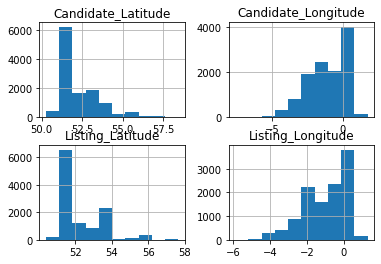

In [0]:
#PLOTTING THE NUMERICAL VALUES
data.hist()

In [0]:
#CHECKING FOR ANY NULL VALUES
data.isnull().any()

Listing_ID              False
Candidate_ID            False
Listing_Content         False
ATS_Status              False
Listing_Longitude       False
Listing_Latitude        False
Candidate_Longitude     False
Candidate_Latitude      False
Listing_Jobtitle        False
CV_Experience           False
Listing_Skills          False
CV_Skills               False
CV_Highest_Education    False
dtype: bool

In [0]:
#INSTALLING GEOPANDAS LIBRARIES FOR PLOTTING COORDIANTE INSTANCES ON THE MAP
!pip install geopandas

     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 10.1MB 38.1MB/s 
     |████████████████████████████████| 11.9MB 34.2MB/s 


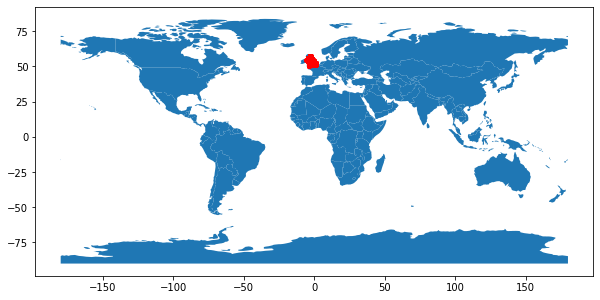

In [0]:
#ALL THE JOB LISTING  
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(data['Listing_Longitude'], data['Listing_Latitude'])]
gdf = GeoDataFrame(data, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);



#We see that all the job posted are in the France.

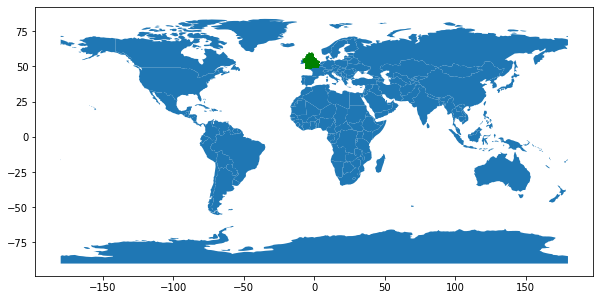

In [0]:
#CANDIDATE APPLYING FOR THE JOB 
#LOADING GEOPANDAS AND SHAPELY DEPENDENCIES 
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(data['Candidate_Longitude'], data['Candidate_Latitude'])]
gdf = GeoDataFrame(data, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='x', color='green', markersize=15);




In [0]:
loc

'/content/gdrive/My Drive/NLP Case Study/use_case_data.json'

In [0]:
import json
with open(loc, 'r') as j:
    d = json.load(j)
    

In [0]:
print(type(d))
print(type(d[0]))
print(json.dumps(d[0], indent=2))

<class 'list'>
<class 'dict'>
{
  "Listing_ID": "00250608015BFE1CA028A1D6268179E2108E96CA8C17853859E6B450DAEBA40B",
  "Candidate_ID": "12A643CFAB1ABD612796BAEEE9EAF2765C796898BC599C035187EC2E560A1BAD",
  "Listing_Content": "role due continued rapid growth recruited one systems engineer client looking second support excellent interpersonal skill customer service approach intention successful candidate grow aspirations progress career envisaged time involve travelling premises main duties managing helpdesk tickets maintaining knowledge base monitoring daily backup reports responding monitoring system alerts visiting issues require onsite resource taking leading role internal projects sharing experience knowledge engineers engineers expected keep happy times take ownership problems clients report us ensure team clearly identify happen next see resolution record work carried future reference work part gain understanding systems share research new technologies take advantage support provide

In [0]:
#INSTALLING THE FLATTEN JSON TO FLATTEN THE JSON DATASET INTO CSV
!pip install flatten_json

In [0]:
from flatten_json import flatten

In [0]:
dic_flattened = (flatten(i) for i in d)

In [0]:
df = pd.DataFrame(dic_flattened)

In [0]:
data['CV_Highest_Education'][0:20]

0                Bachelors
1                Bachelors
2                Bachelors
3     Some 2ndry Schooling
4                Bachelors
5                Bachelors
6                  Masters
7                Bachelors
8     Some 2ndry Schooling
9                Bachelors
10    Some 2ndry Schooling
11                     ---
12               Bachelors
13                     ---
14               Bachelors
15               Bachelors
16               Bachelors
17               Bachelors
18    Some 2ndry Schooling
19                     ---
Name: CV_Highest_Education, dtype: object

In [0]:
#COMPUTING THE HIGHEST NUMBER OF JOB TITLES
data['Listing_Jobtitle_0_Title'].value_counts().head(30).sort_values(ascending = False)

it_support_engineer              946
it_technician                    611
installation_engineer            345
it_support_technician            297
telecoms_engineer                248
delivery_manager                 234
telecommunications_engineer      213
it_project_manager               209
it_support_analyst               201
it_support                       186
desktop_support_administrator    180
desktop_support_engineer         147
technical_support_engineer       140
1st_line_support_engineer        138
support_engineer                 133
service_delivery_manager         126
1st_line_support                 118
it_manager                       118
support_analyst_technician       111
2nd_line_engineer                108
test_analyst                     108
junior_web_developer             105
customer_administrator            94
2nd_line_support                  90
technical_business_analyst        90
software_tester                   88
front_end_developer               81
a

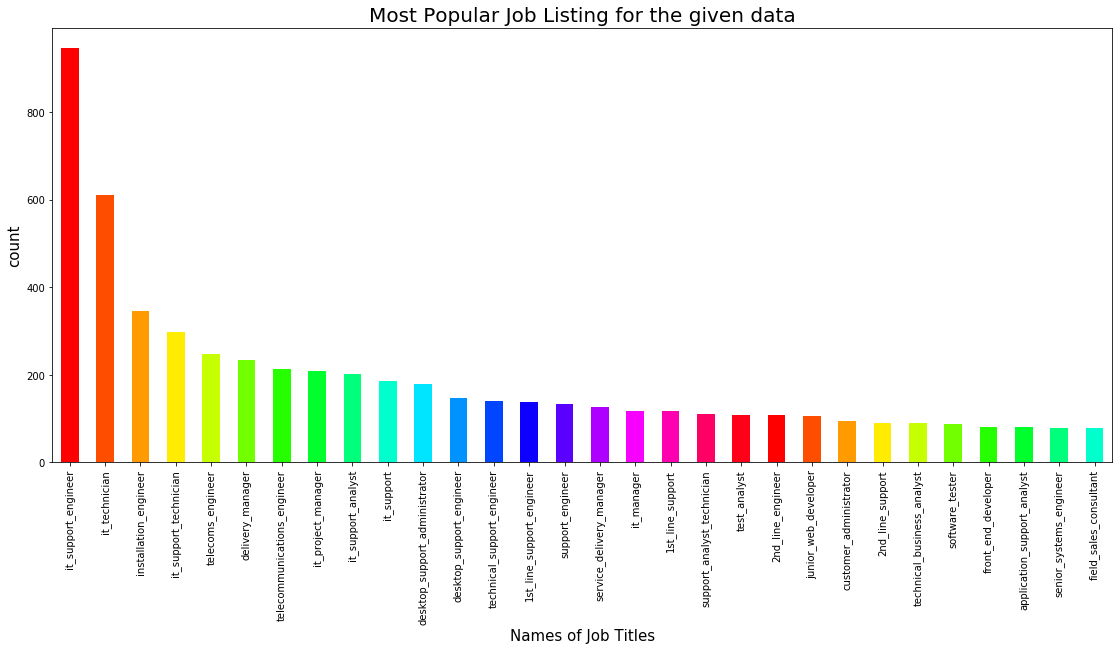

In [0]:
#PLOTTING THE MOST POPULAR JOB LISTING
plt.rcParams['figure.figsize'] = (19, 8)

color = plt.cm.hsv(np.linspace(0, 1, 20))
df['Listing_Jobtitle_0_Title'].value_counts().head(30).sort_values(ascending = False).plot.bar(color = color)
plt.title("Most Popular Job Listing for the given data", fontsize = 20)
plt.xlabel('Names of Job Titles', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [0]:
#COMPUTING THE MOST JOB TITLE DISCIPLINE
data['Listing_Jobtitle_0_Discipline'].value_counts().head(30).sort_values(ascending = False)

it                        10047
engineering                 463
customer_service            246
management                  197
skilled_trades              114
sales                       107
logistics                   105
administration              102
manufacturing                78
consulting                   62
education                    50
marketing                    48
finance                      34
retail                       17
construction                 13
human_resources              12
banking                       8
arts_and_entertainment        4
no_discipline                 4
media                         2
Name: Listing_Jobtitle_0_Discipline, dtype: int64

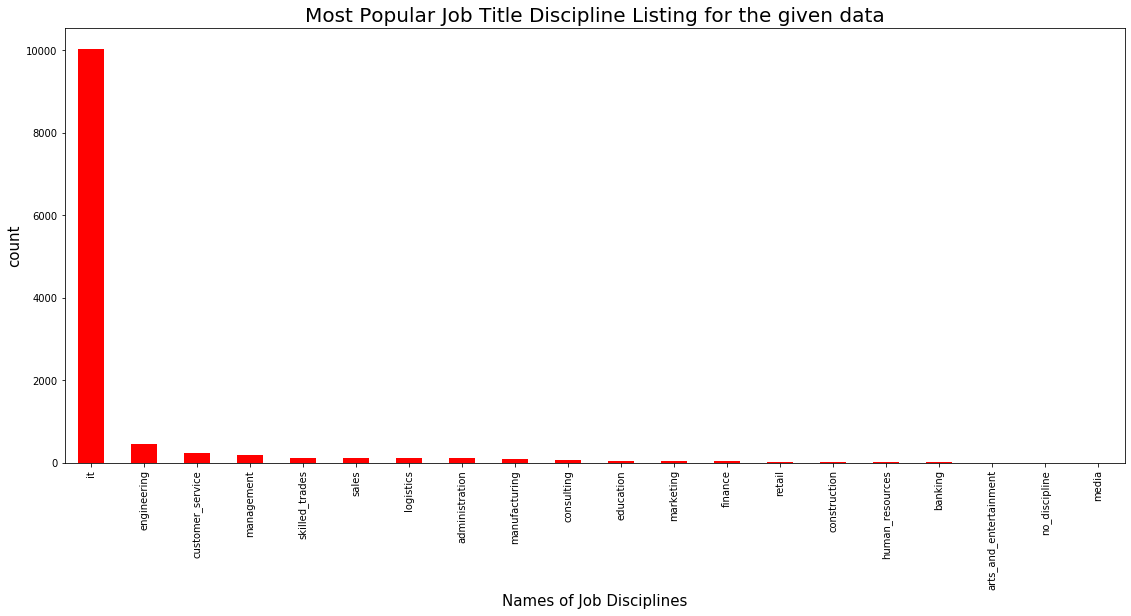

In [0]:
#PLOTTING THE MOST POPULAR JOB TITLE DISCIPLINE
plt.rcParams['figure.figsize'] = (19, 8)

color = plt.cm.hsv(np.linspace(0, 1, 20))
data['Listing_Jobtitle_0_Discipline'].value_counts().head(30).sort_values(ascending = False).plot.bar(color = 'red')
plt.title("Most Popular Job Title Discipline Listing for the given data", fontsize = 20)
plt.xlabel('Names of Job Disciplines', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [0]:
#COMPUTING THE MOST POPULAR CV EXPERIENCE 
data['CV_Experience_0_Title_0'].value_counts().head(40).sort_values(ascending = False)

sales_assistant                    177
project_manager                    151
service_desk_analyst               145
it_support                         122
warehouse_operative                115
engineer                           103
it_support_engineer                102
support_engineer                   100
it_manager                          99
it_technician                       93
it_support_analyst                  89
administrator                       88
it_support_technician               84
network_engineer                    81
test_analyst                        80
volunteer                           79
it_engineer                         75
customer_service_representative     74
manager                             71
assistant                           71
senior_engineer                     61
customer_service_assistant          60
customer_assistant                  57
team_leader                         57
assistant_manager                   56
customer_service_advisor 

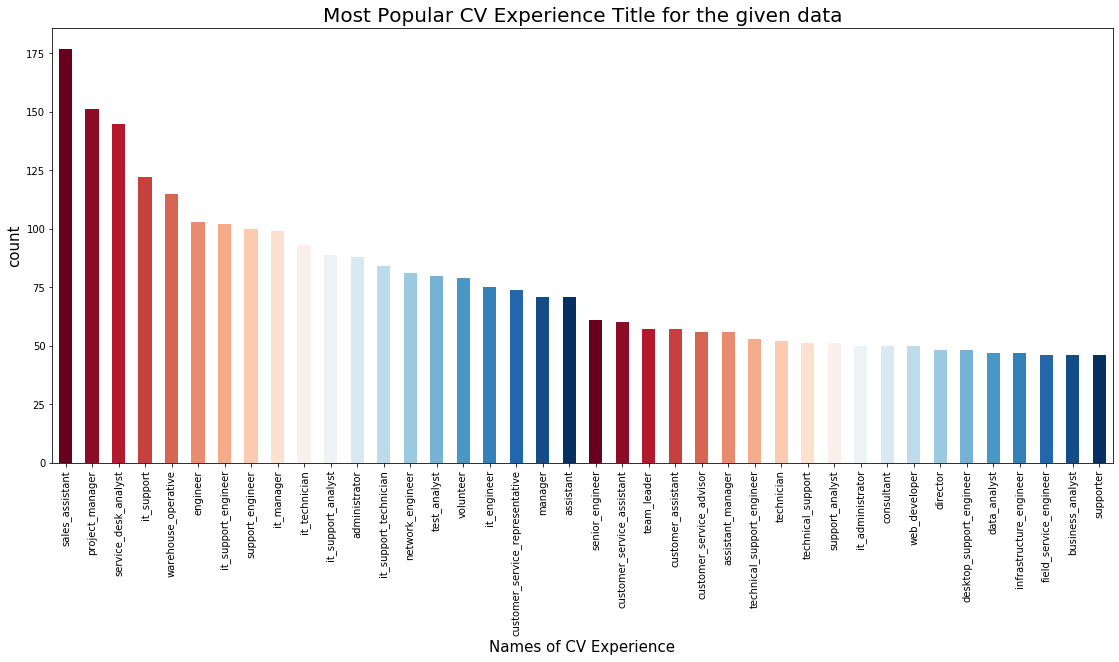

In [0]:
#PLOTTING THE MOST POPULAR CV EXPERIENCE TITLE FOR THE GIVEN DATA
plt.rcParams['figure.figsize'] = (19, 8)

color = plt.cm.RdBu(np.linspace(0, 1, 20))
data['CV_Experience_0_Title_0'].value_counts().head(40).sort_values(ascending = False).plot.bar(color = color)
plt.title("Most Popular CV Experience Title for the given data", fontsize = 20)
plt.xlabel('Names of CV Experience', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [0]:
#COMPUTING THE MOST POPULAR LISTING SKILLS
data['Listing_Skills_0'].value_counts().head(40).sort_values(ascending = False)

firewall                       902
driving license                517
history                        476
routers                        475
financial services             455
technology                     392
sharepoint                     386
managing                       338
analysis                       324
sql                            281
iso                            233
scheduling                     213
meet deadlines                 173
selenium                       154
mcitp                          151
attention to detail            147
mobile operating systems       126
vehicles                       123
networks                       121
operating systems              119
java                           114
sql server                     109
hubs                           105
android                        102
liability insurance            100
computing                       93
budget                          92
presentation                    91
empathy             

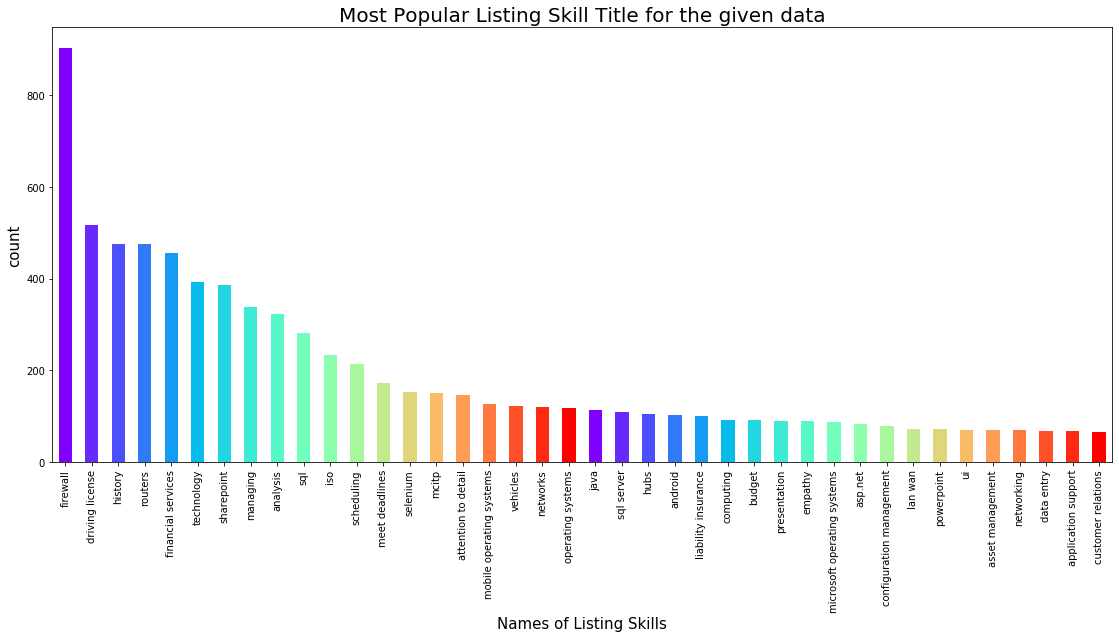

In [0]:
#PLOTTING THE MOST POPULAR LISTING SKILL TITLE
plt.rcParams['figure.figsize'] = (19, 8)

color = plt.cm.rainbow(np.linspace(0, 1, 20))
data['Listing_Skills_0'].value_counts().head(40).sort_values(ascending = False).plot.bar(color = color)
plt.title("Most Popular Listing Skill Title for the given data", fontsize = 20)
plt.xlabel('Names of Listing Skills', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [0]:
#MOST FREQUENT ATS SCORE
data['ATS_Status'].value_counts().head(40).sort_values(ascending = False)

R    9117
S    2257
I     313
H      26
Name: ATS_Status, dtype: int64

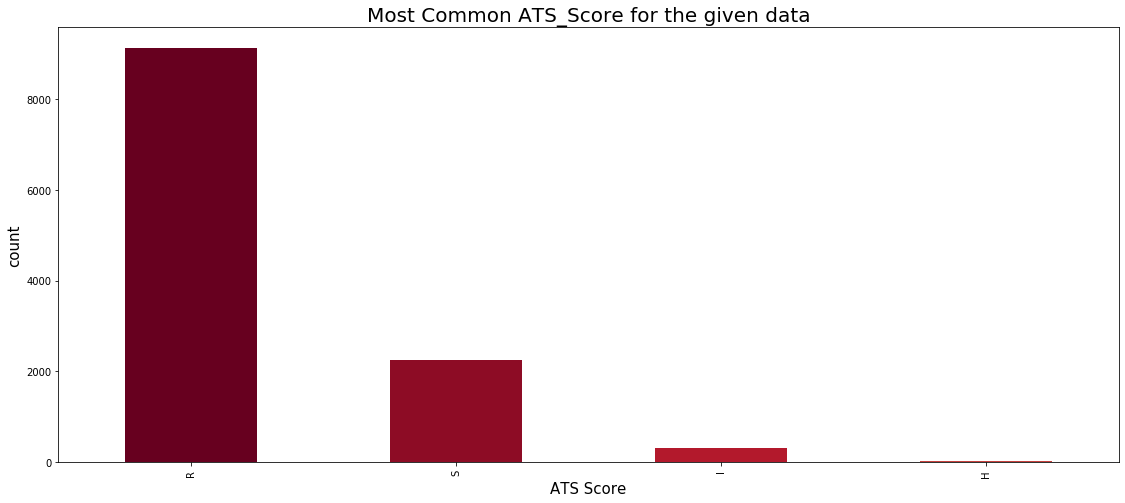

In [0]:
#PLOTTING THE MOST COMMON ATS SCORE FOR THE GIVEN DATA
plt.rcParams['figure.figsize'] = (19, 8)

color = plt.cm.RdBu(np.linspace(0, 1, 20))
data['ATS_Status'].value_counts().head(40).sort_values(ascending = False).plot.bar(color = color)
plt.title("Most Common ATS_Score for the given data", fontsize = 20)
plt.xlabel('ATS Score', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [0]:
#HIGHEST EDUCATION FREQUENCY
data['CV_Highest_Education'].value_counts().head(40).sort_values(ascending = False)

---                     3963
Bachelors               3734
Masters                 2064
Some 2ndry Schooling    1952
Name: CV_Highest_Education, dtype: int64

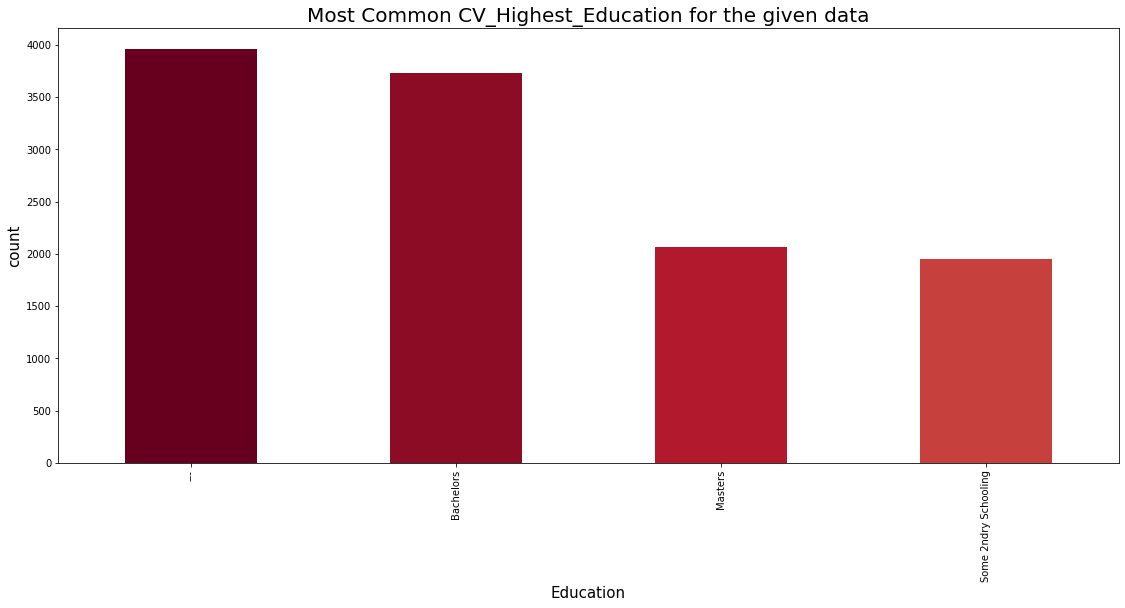

In [0]:
#PLOTTING THE HIGHEST EDUCATION FREQUENCY
plt.rcParams['figure.figsize'] = (19, 8)

color = plt.cm.RdBu(np.linspace(0, 1, 20))
data['CV_Highest_Education'].value_counts().head(40).sort_values(ascending = False).plot.bar(color = color)
plt.title("Most Common CV_Highest_Education for the given data", fontsize = 20)
plt.xlabel('Education', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

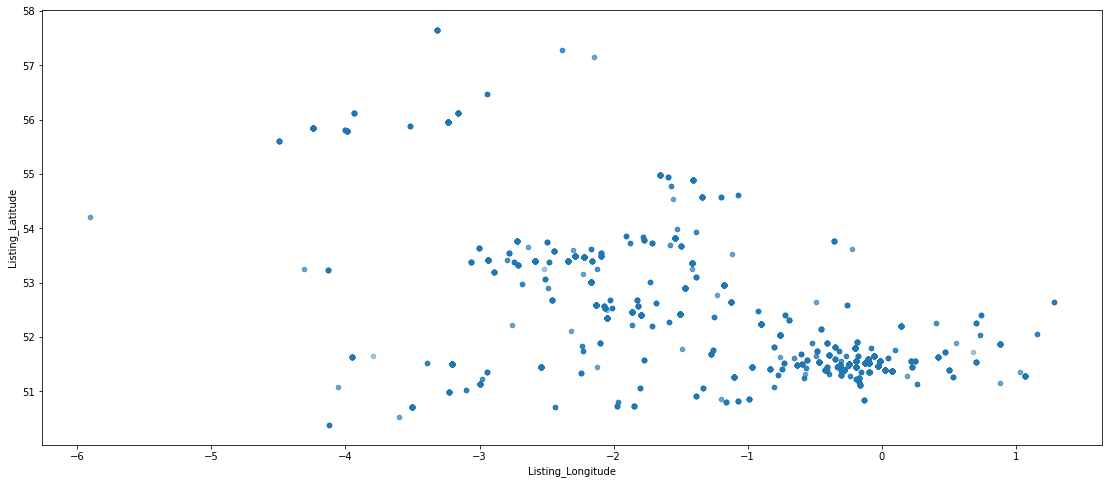

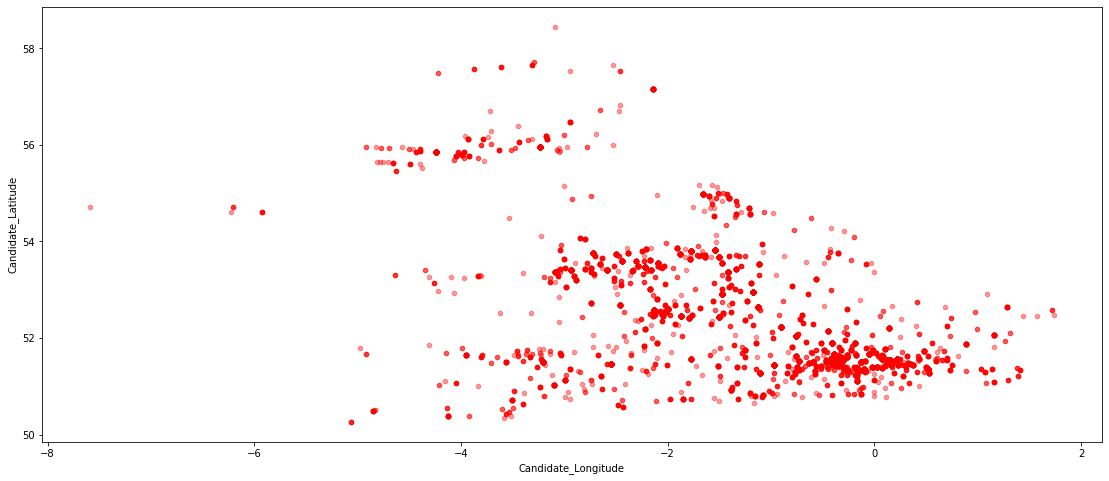

In [0]:
#DISTRIBUTION OF THE JOB AND THE CANDIDATE LOCATION
data.plot(kind="scatter", x="Listing_Longitude", y="Listing_Latitude", alpha=0.4)
data.plot(kind="scatter", x="Candidate_Longitude", y="Candidate_Latitude", alpha=0.4 , color='red')

plt.show()

In [0]:
#FOR COMPUTING THE DISTANCE BETWEEN THE TWO COORDINATES
import geopy.distance


def compute_distance(l1,l2, c1,c2):
  coords_1 = (l1,l2)
  coords_2 = (c1,c2)
  return (geopy.distance.vincenty(coords_2, coords_1).km)

In [0]:
compute_distance(df['Listing_Latitude'][0],df['Listing_Longitude'][0],df['Candidate_Latitude'][0],df['Candidate_Latitude'][0])

3607.8957912267147

In [0]:
#CREATING NEW COLUMN Distance_between_Jobs_Cand FOR STORING THE DISTANCE BETWEEN THE JOB AND CANDIDATE LOCATION
sLength = len(df['Listing_Latitude'])
df = df.assign(Distance_between_Jobs_Cand=np.random.randn(sLength))

In [0]:
for i in range(len(df)):
  df['Distance_between_Jobs_Cand'][i]=compute_distance(df['Listing_Latitude'][i],df['Listing_Longitude'][i],df['Candidate_Latitude'][i],df['Candidate_Latitude'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
#COMPUTING THE MOST FREQUENCY DISTANCE BETWEEN THE JOB AND THE CANDIDATE
data['Distance_between_Jobs_Cand'].value_counts().head(40).sort_values(ascending = False)

3506.034069    756
3601.680499    321
3514.893253    289
3503.364667    254
3603.305706    217
3503.319933    203
3515.970912    199
3507.889564    195
3499.117900    187
3510.615476    156
3551.254221    156
3549.632994    112
3646.824609     97
3666.088557     86
3502.778197     86
3707.715718     66
3642.686321     65
3554.788420     59
3550.815979     55
3605.116249     49
3575.605234     47
3569.068201     46
3546.822116     44
3581.846315     42
3541.103210     41
3523.065785     41
3617.356762     36
3605.904305     35
3619.946272     35
3603.630656     35
3612.634108     34
3600.555712     32
3548.886114     32
3581.264539     30
3548.541474     30
3614.848790     29
3602.913848     29
3606.017313     29
3602.557582     29
3600.730390     29
Name: Distance_between_Jobs_Cand, dtype: int64

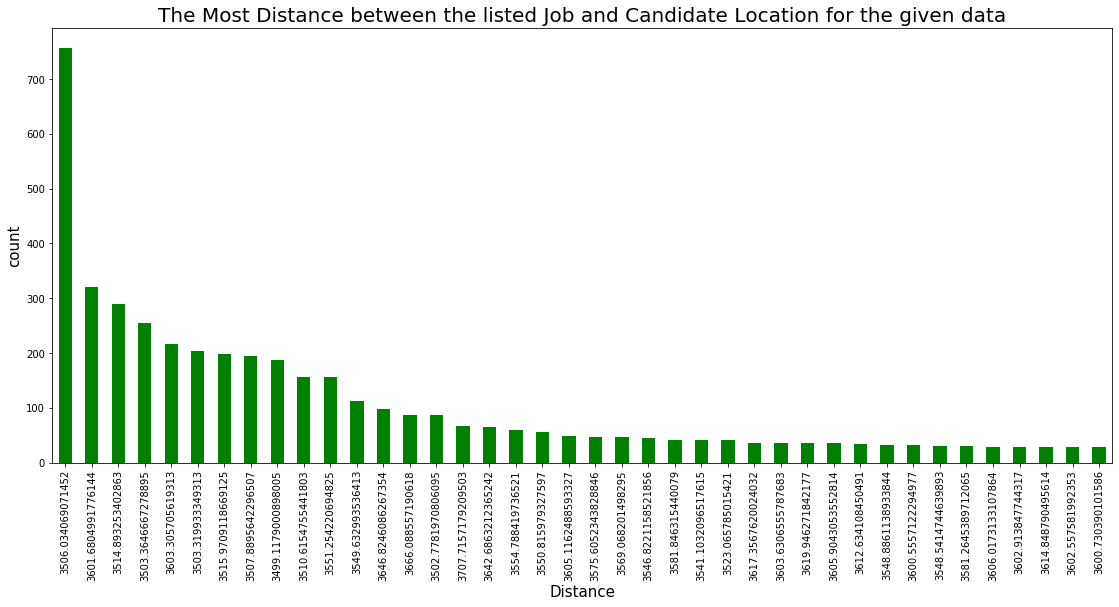

In [0]:
#PLOTTING THE MOST FREQUENT DISTANCE BETWEEN THE JOB ADN THE CANDIDATE LOCATION
plt.rcParams['figure.figsize'] = (19, 8)

color = plt.cm.RdBu(np.linspace(0, 1, 20))
data['Distance_between_Jobs_Cand'].value_counts().head(40).sort_values(ascending = False).plot.bar(color = 'green')
plt.title("The Most Distance between the listed Job and Candidate Location for the given data", fontsize = 20)
plt.xlabel('Distance', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [0]:
#Average location of the applicants applying for the job

distance= sum(df['Distance_between_Jobs_Cand'])/len(df['Distance_between_Jobs_Cand'])
print(distance)

3553.1843818140155


In [0]:
#INSTALL THE LIBRARY FOR RETRIEVING THE LOCATION NAME BASED ON THE COORDINATES
!pip install pygeocoder

In [0]:
#INSTALLING THE DEPENENCIES FOR THE LOCATION BASED ON THE COORDINATES
!pip install reverse_geocoder
!pip install pprint

     |████████████████████████████████| 2.3MB 2.8MB/s 
  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-cp36-none-any.whl size=2268090 sha256=9694a14903ed474acc3fc3b2ea26fe1e47e2faaa7510ec1f03fab4b990970d10
  Stored in directory: /root/.cache/pip/wheels/47/05/50/b1350ff094ef91e082665b4a2f9ca551f8acea4aa55d796b26
Successfully built reverse-geocoder
  Created wheel for pprint: filename=pprint-0.1-cp36-none-any.whl size=1250 sha256=c43193071a8f2acb49730f856cd96de46f76d90e9358b90436a4738b2b2cdf1f
  Stored in directory: /root/.cache/pip/wheels/42/d4/c6/16a6495aecc1bda5d5857bd036efd50617789ba9bea4a05124
Successfully built pprint


In [0]:
#FOR COMPUTING THE LOCATION NAME BASED ON THE COORDINATES
import reverse_geocoder as rg 
import pprint 
  
def reverseGeocode(coordinates): 
    result = rg.search(coordinates)
    return result[0]['name'] 
    #pprint.pprint(result['name']) 
      

In [0]:
#ASSIGNING NEW COLUMN Job_location FOR STORING THE LOCATION NAME BASED ON COORDINATES
sLength = len(df['Listing_Latitude'])
df = df.assign(Job_location=np.random.randn(sLength))

In [0]:
for i in range(len(df)):
  df['Job_location'][i]=reverseGeocode((df['Listing_Latitude'][i],df['Listing_Longitude'][i]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#COMPUTING THE MOST FREQUENT JOB DESTINATION
data['Job_location'].value_counts().head(30).sort_values(ascending = False)

Barbican              1522
Manchester             781
Earlsfield             576
Birmingham             486
Catford                471
Chapel Allerton        457
Walthamstow            401
Hammersmith            392
London                 384
Wood Green             375
Belsize Park           333
Nottingham             241
Bromley                235
Liverpool              211
Kingswood              206
Orgreave               149
Derby                  143
Cardiff                141
Surbiton               140
Glasgow                139
Salford                133
Wolverhampton          129
Solihull                94
Milton Keynes           90
Warrington              87
Edinburgh               86
Coventry                86
Altrincham              83
Northampton             81
Welwyn Garden City      80
Name: Job_location, dtype: int64

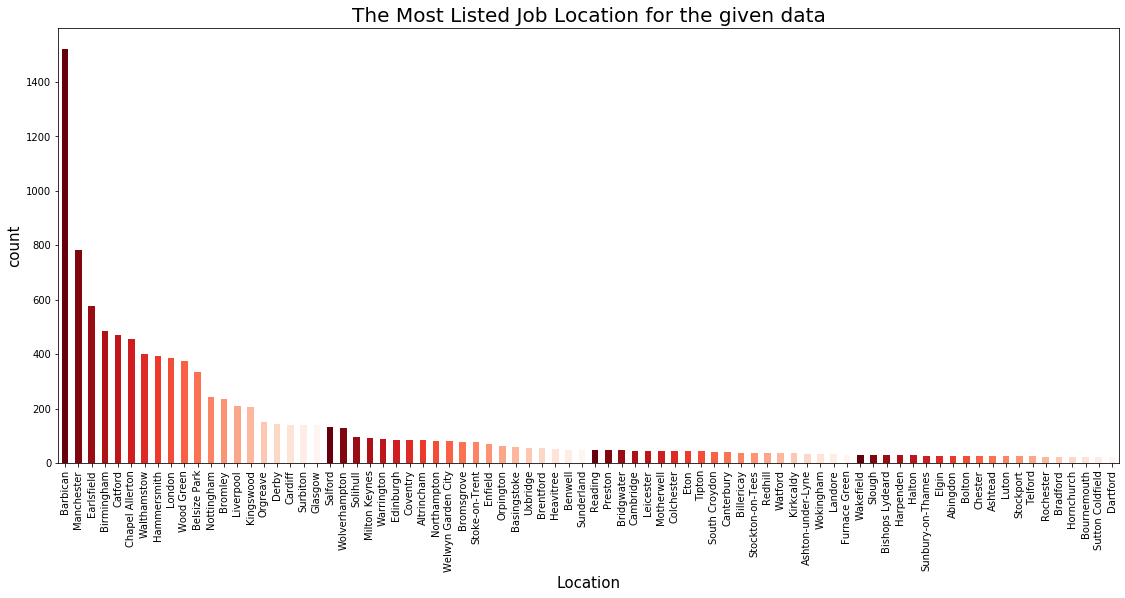

In [0]:
#PLOTTING THE MOST FREQUENT JOB LOCATION
plt.rcParams['figure.figsize'] = (19, 8)

color = plt.cm.Reds_r(np.linspace(0, 1, 20))
data['Job_location'].value_counts().head(80).sort_values(ascending = False).plot.bar(color = color)
plt.title("The Most Listed Job Location for the given data", fontsize = 20)
plt.xlabel('Location', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [0]:
#ASSIGNING THE  Candidate_Location BASED ON COORRDINATES 
sLength = len(data['Listing_Latitude'])
data = data.assign(Candidate_Location=np.random.randn(sLength))

In [0]:
for i in range(len(data)):
  data['Candidate_Location'][i]=reverseGeocode((data['Candidate_Latitude'][i],data['Candidate_Longitude'][i]))
  print(i)

0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [0]:
#MOST FREQUENT CANDIDATE LOCATION
data['Candidate_Location'].value_counts().head(30).sort_values(ascending = False)

London             2738
Manchester          535
Birmingham          425
Chapel Allerton     207
Liverpool           206
Nottingham          157
Glasgow             122
Coventry            118
Luton               111
Orgreave            107
Kingswood           106
Milton Keynes       105
Wolverhampton       102
Reading              98
Ilford               98
Derby                97
Cardiff              95
Leicester            94
Wembley              93
Northampton          91
Becontree            90
Bradford             85
Hornchurch           82
Edinburgh            81
Greenhill            79
Basingstoke          76
Chatham              70
Carshalton           67
Slough               66
South Croydon        65
Name: Candidate_Location, dtype: int64

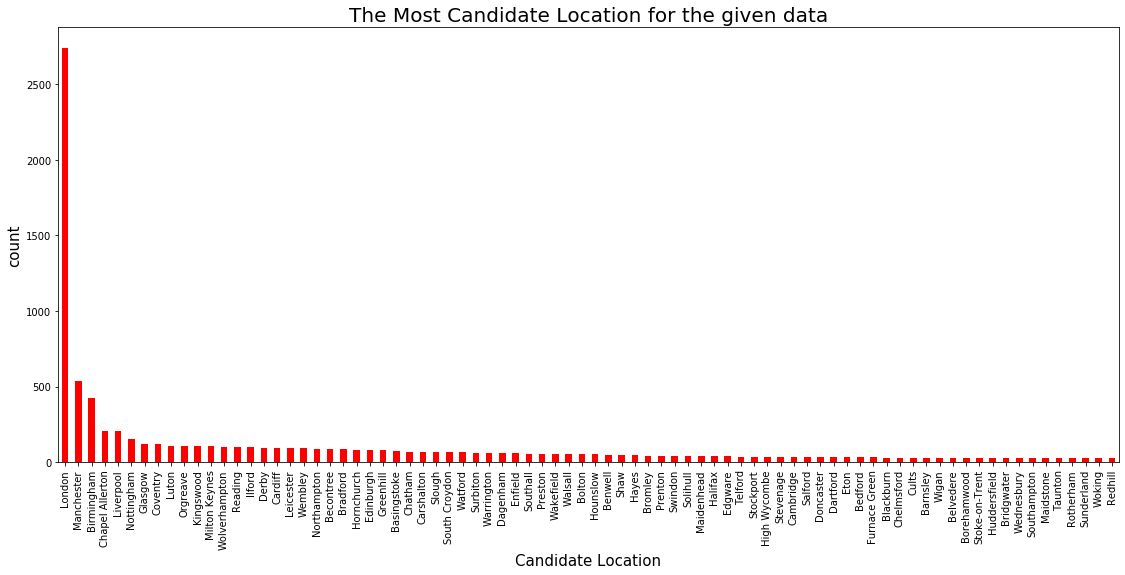

In [0]:
#PLOTTING THE MOST FREQUENT CANDIDATE LOCATION
plt.rcParams['figure.figsize'] = (19, 8)

color = plt.cm.Blues(np.linspace(0, 1, 20))
data['Candidate_Location'].value_counts().head(80).sort_values(ascending = False).plot.bar(color = 'red')
plt.title("The Most Candidate Location for the given data", fontsize = 20)
plt.xlabel('Candidate Location', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [0]:
loc

'/content/gdrive/My Drive/NLP Case Study/use_case_data.json'

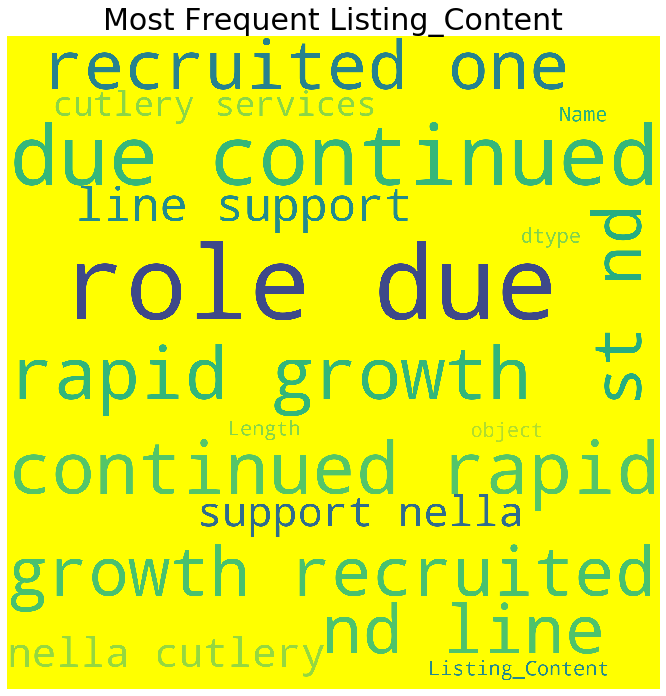

In [0]:
#PLOTTING THE MOST FREQUENT LISTING CONTENT WORD 
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'yellow',
                      width = 2000,
                      height = 2000).generate(str(df['Listing_Content']))

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Frequent Listing_Content', fontsize = 30)
plt.show()

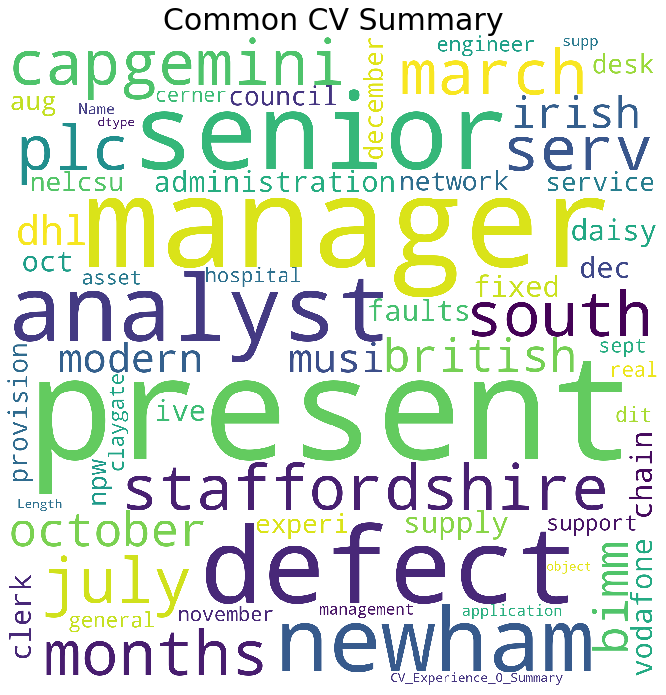

In [0]:
#PLOTTING THE MOST FREQUENT COMMONN CV SUMMARY
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white',
                      width = 2000,
                      height = 2000).generate(str(df['CV_Experience_0_Summary']))

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Common CV Summary', fontsize = 30)
plt.show()

In [0]:
#ASSIGNING NEW COLUMN EXPERIENCE TO STORE EXPERIENCE 
sLength = len(data['Listing_Latitude'])
data = data.assign(Experience=np.random.randn(sLength))

In [0]:
import datetime as dt


In [0]:
data['CV_Experience_0_Startdate'] = pd.to_datetime(data['CV_Experience_0_Startdate'], format='%Y-%m-%d %H:%M:%S') # FOR CONVERTING TO THE GIVEN DATA FORMAT

In [0]:
# FOR CONVERTING TO THE GIVEN DATA FORMAT
data['CV_Experience_0_Enddate'] = pd.to_datetime(data['CV_Experience_0_Enddate'], format='%Y-%m-%d %H:%M:%S')

In [0]:
#SUBTRACTING BETWEEN THE DATES
data['Experience'][0] = (data['CV_Experience_0_Enddate'][0]-data['CV_Experience_0_Startdate'][0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# CONVERTING YEARS TO THE YEAR DATETIME FORMAT
data['Experience'][0]=data['Experience'][0]/np.timedelta64(1,'Y')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data['Experience'][0]

6.936643111698493

In [0]:
#COMPUTING THE EXPERIENCE FOR THE ENTIRE DATAFRAME
for i in range(len(data)):
  data['Experience'][i] = (data['CV_Experience_0_Enddate'][i]-data['CV_Experience_0_Startdate'][i])
  data['Experience'][i]=data['Experience'][i]/np.timedelta64(1,'Y')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
data['Experience'].value_counts().head(20).sort_values(ascending = False)

1.998672    192
0.249150    183
0.416162    164
0.164274    157
2.998008    133
0.331287    131
0.577698    114
0.996598    103
3.997344     99
0.334025     93
1.995934     85
0.583174     78
0.501037     76
0.410686     76
0.246412     74
3.082883     74
0.911723     73
1.081473     67
0.325811     67
0.492823     64
Name: Experience, dtype: int64

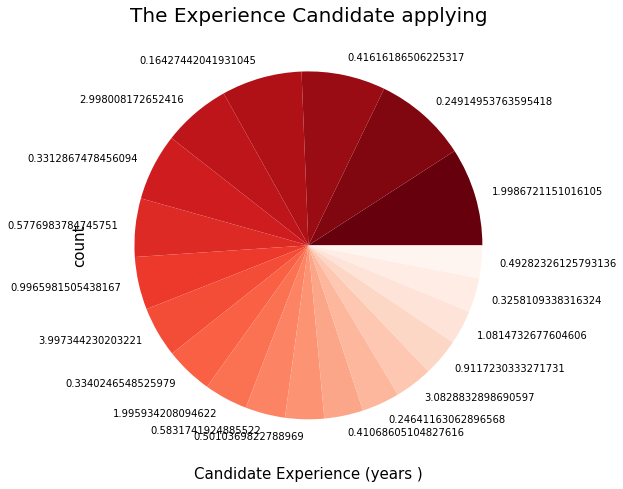

In [0]:
#MOST EXPERIENCE FREQUENCY PLOTTING
plt.rcParams['figure.figsize'] = (19, 8)

color = plt.cm.Reds_r(np.linspace(0, 1, 20))
data['Experience'].value_counts().head(20).sort_values(ascending = False).plot.pie(colors = color)
plt.title("The Experience Candidate applying", fontsize = 20)
plt.xlabel('Candidate Experience (years )', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [0]:
 The data highlights that the candidate applying for the new job are most with 2 years of experience 

In [0]:
data=data.fillna(value=0) #FILLING NAN VALUES WITH 0

In [0]:
#AVERAGE EXPERIENCE 
sum2=0
for i in range(len(data['Experience'])):
  sum2=sum2+data['Experience'][i]

n=len(data)
avg_exp=sum2/n
print("Average Experience applying for the job from the given data {} years".format(avg_exp))

Average Experience applying for the job from the given data 2.342710216849626 years


In [0]:
freshers=[(i==0) for i in data['Experience']].count(True)

In [0]:
# Applicant for the given job with 0 experience in the field applying for the given data
print("With 0 experience ", freshers)

With 0 experience  726


In [0]:
print("Average Experience for the new role for the given data ", avg_exp)

Average Experience for the new role for the given data  nan


In [0]:
#Computing the top job for the top job listed location based on the given data
data_loc=data['Job_location'].value_counts().head(10).sort_values(ascending = False)
data_city=['Barbican','Manchester','Earlsfield','Birmingham','Catford','Chapel Allerton','Walthamstow','Hammersmith','London','Wood Green']
job_list=[]
for i in data_city:
  j=[]
  for k in range(len(data)):
    if i==data['Job_location'][k]:
      j.append(data['Listing_Jobtitle_0_Title'][k])
  job_list.append(j)

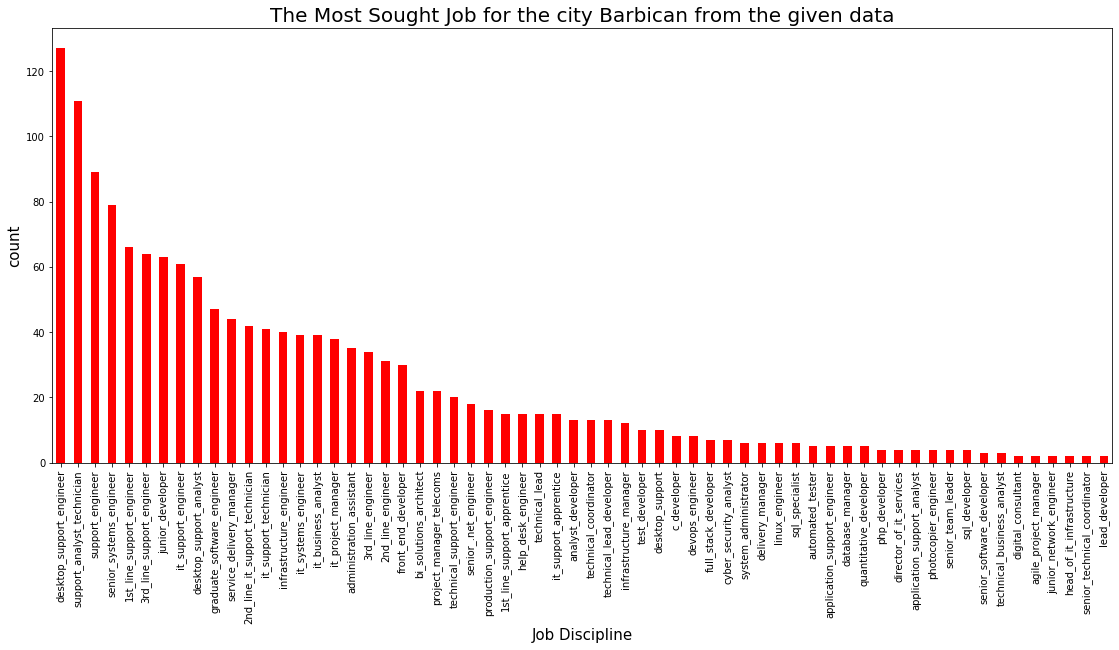

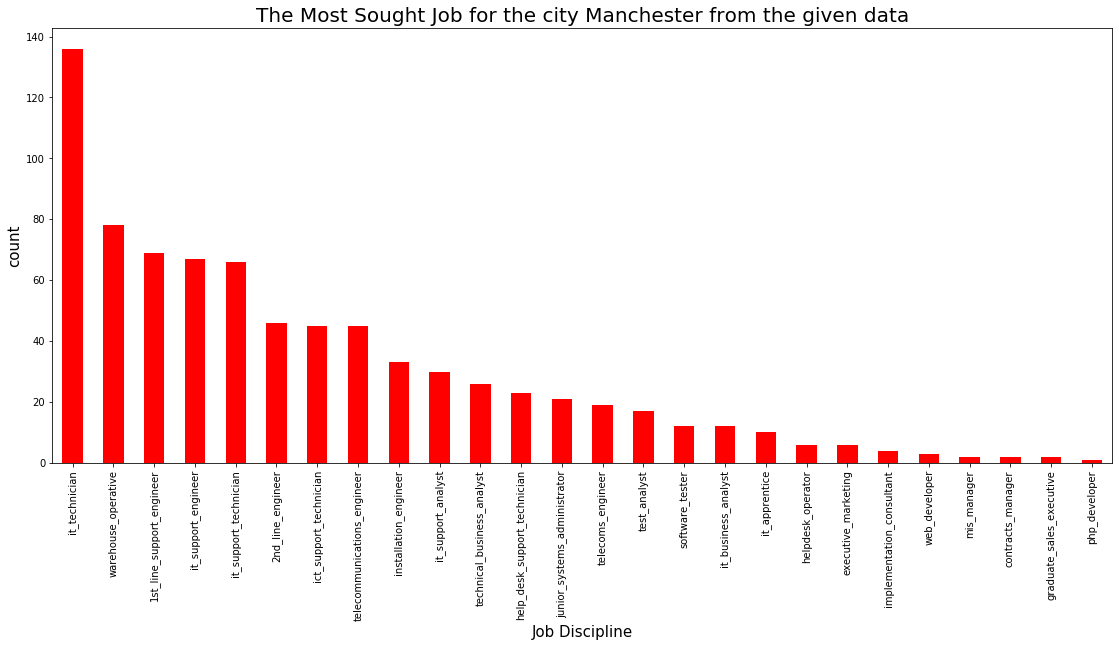

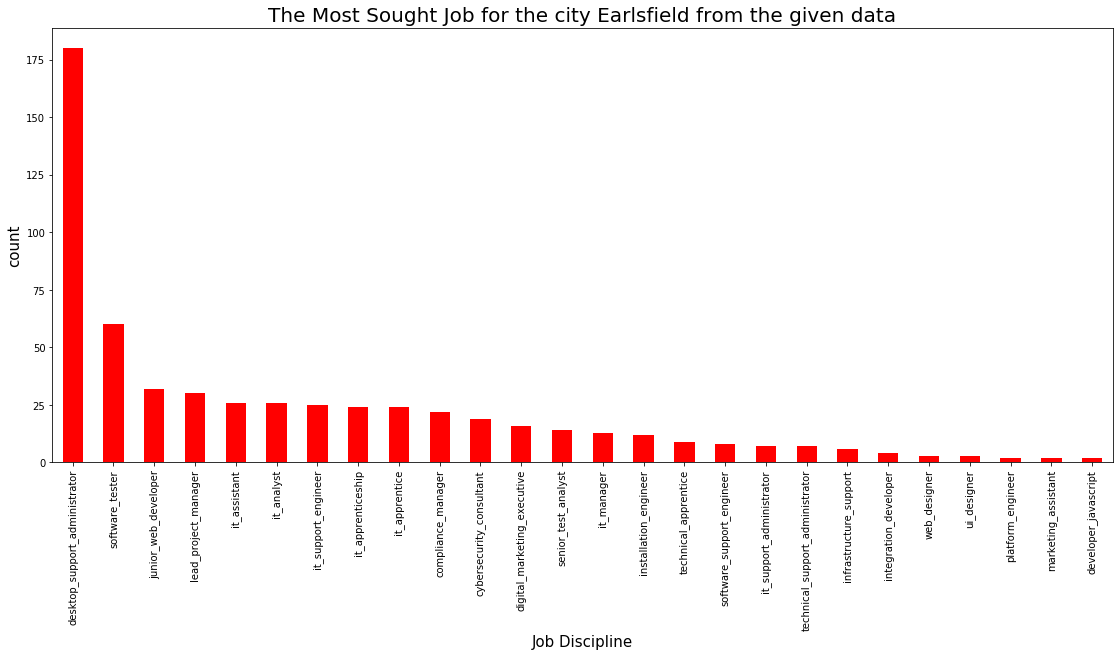

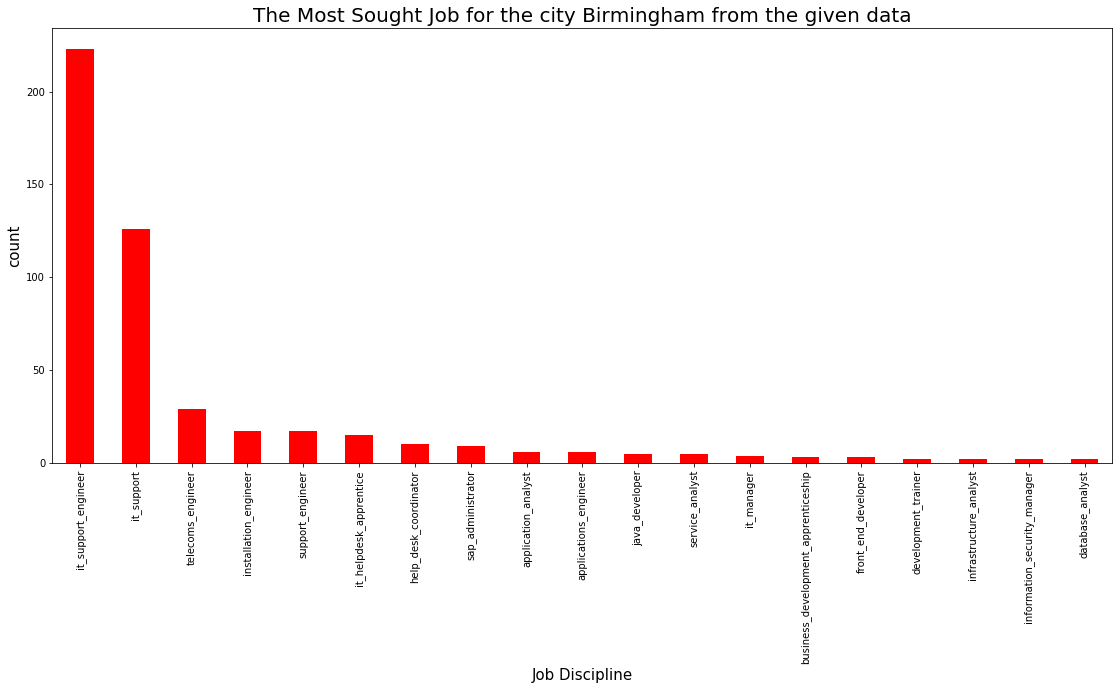

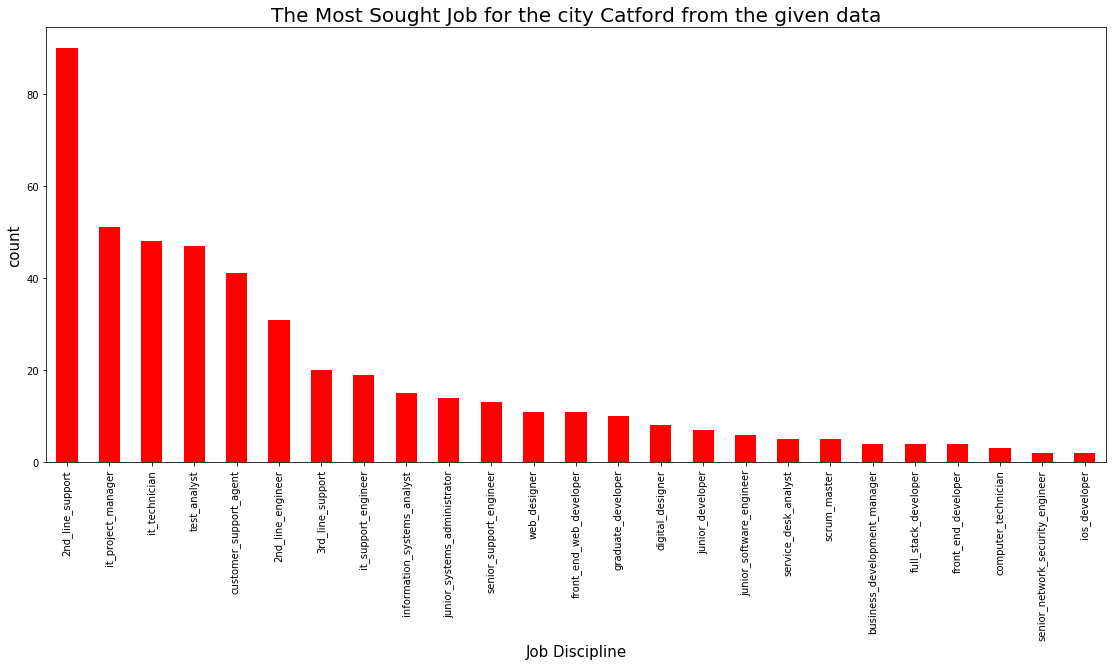

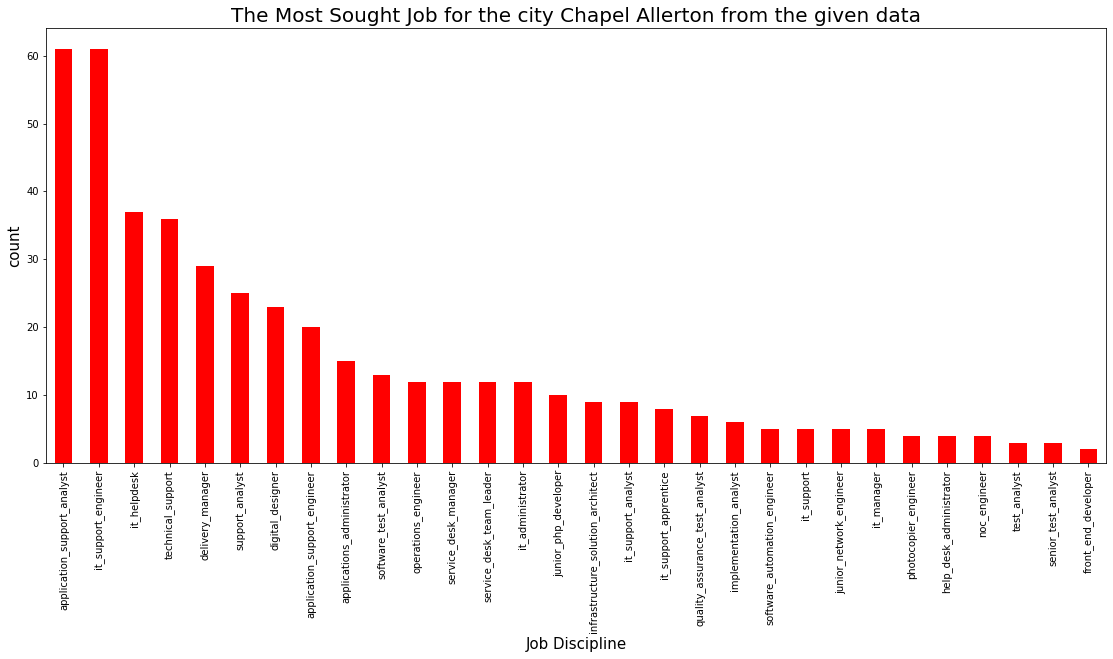

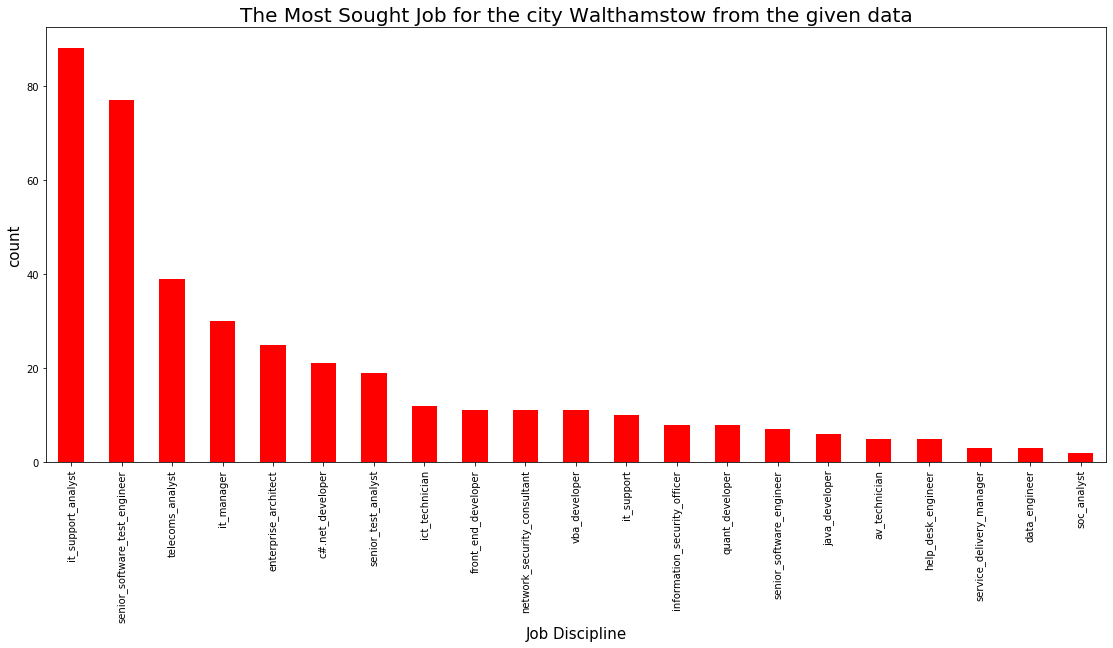

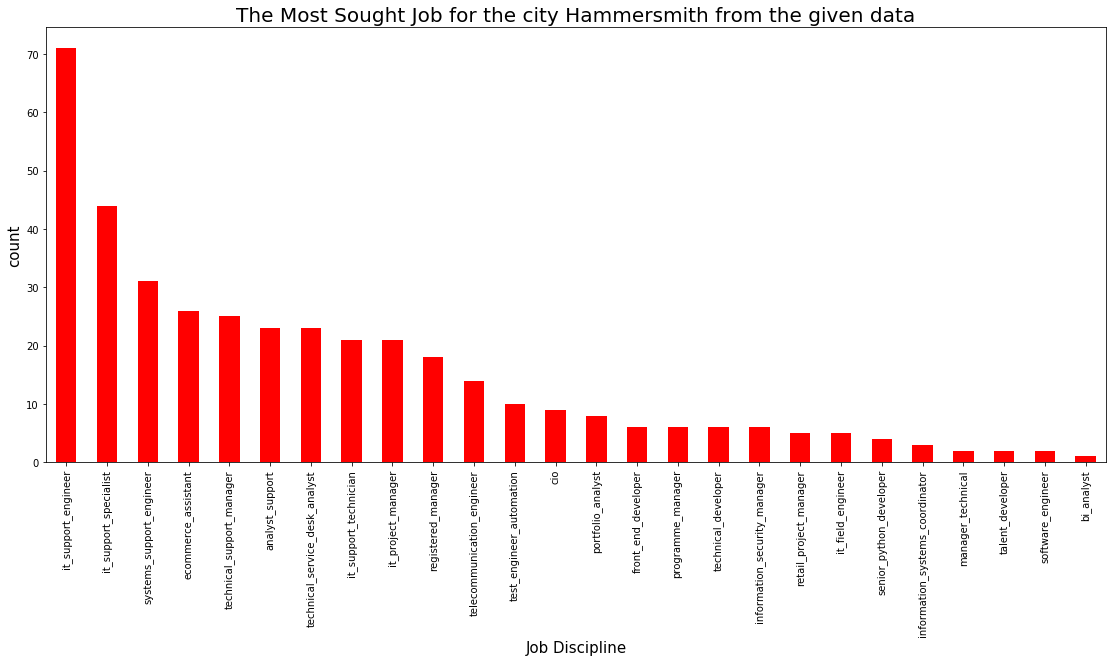

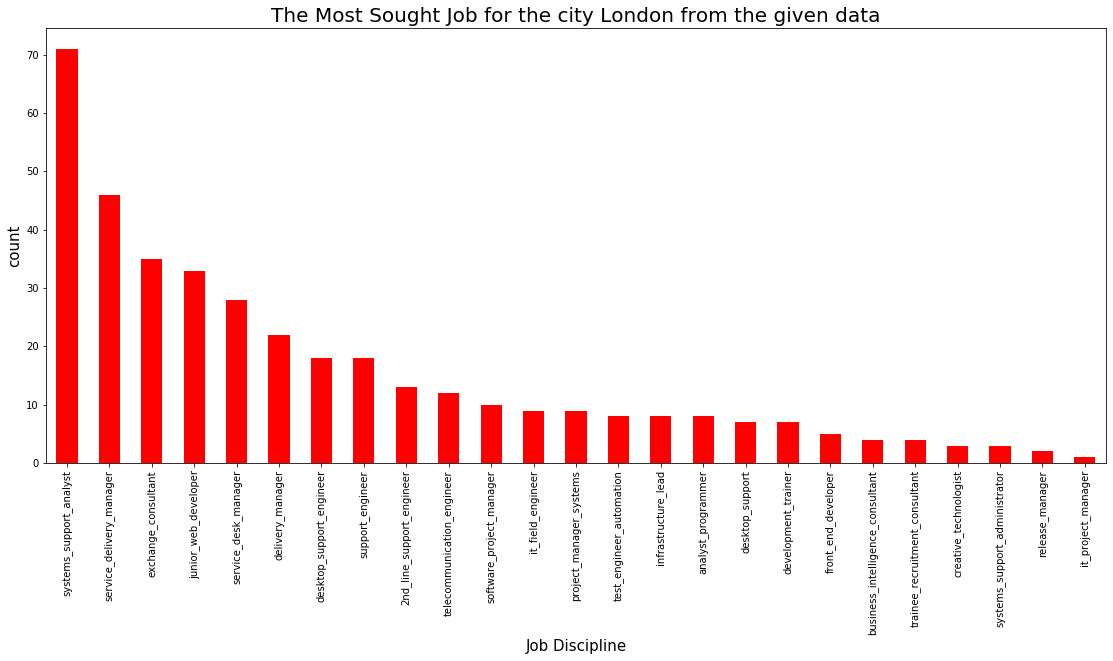

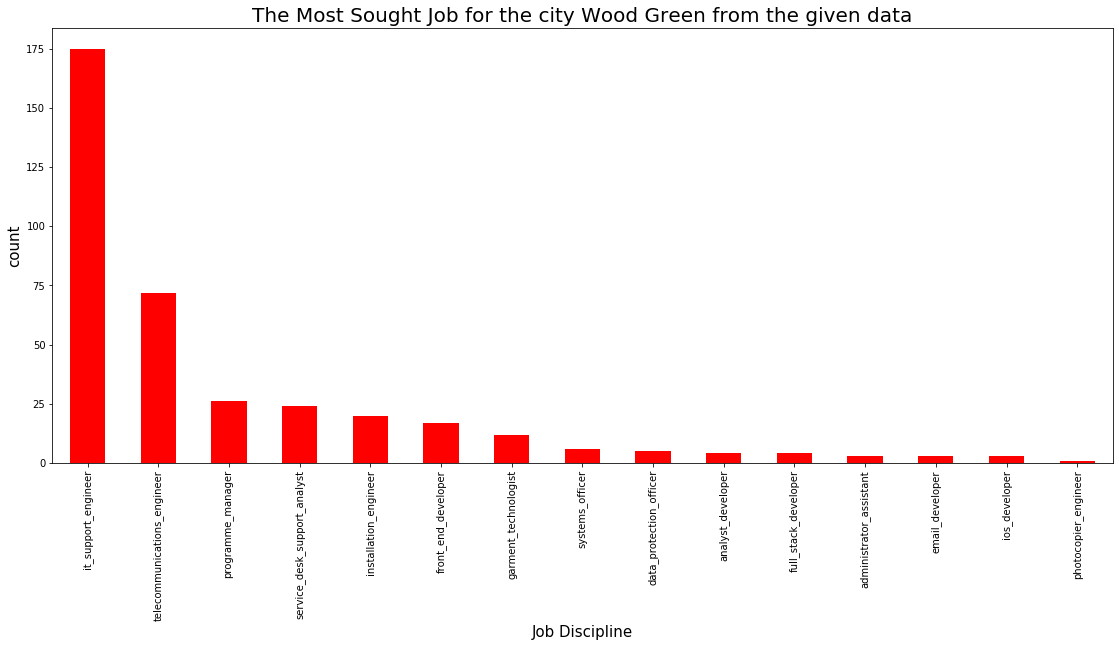

In [0]:
#looping and plotting the top jobs in the top job location
for i in range(len(data_city)):
  df2=pd.DataFrame(job_list[i],columns =['Job_title'])
  
  plt.rcParams['figure.figsize'] = (19, 8)

  color = plt.cm.Greys_r(np.linspace(0, 1, 20))
  df2['Job_title'].value_counts().head(80).sort_values(ascending = False).plot.bar(color ='red')
  plt.title("The Most Sought Job for the city {} from the given data".format(data_city[i]), fontsize = 20)
  plt.xlabel('Job Discipline', fontsize = 15)
  plt.ylabel('count', fontsize = 15)
  plt.show()


In [0]:
data_score=data['ATS_Status'].value_counts().head(10).sort_values(ascending = False)

In [0]:
#based on ats score computing the job coming under the giving categories
data_ats=['R','S','I','H']
data_ats_name=['REJECTED','SELECTED','INTERVIEWED','HIRED']
job_list=[]
for i in data_ats:
  j=[]
  for k in range(len(data)):
    if i==data['ATS_Status'][k]:
      j.append(data['Listing_Jobtitle_0_Title'][k])
  job_list.append(j)

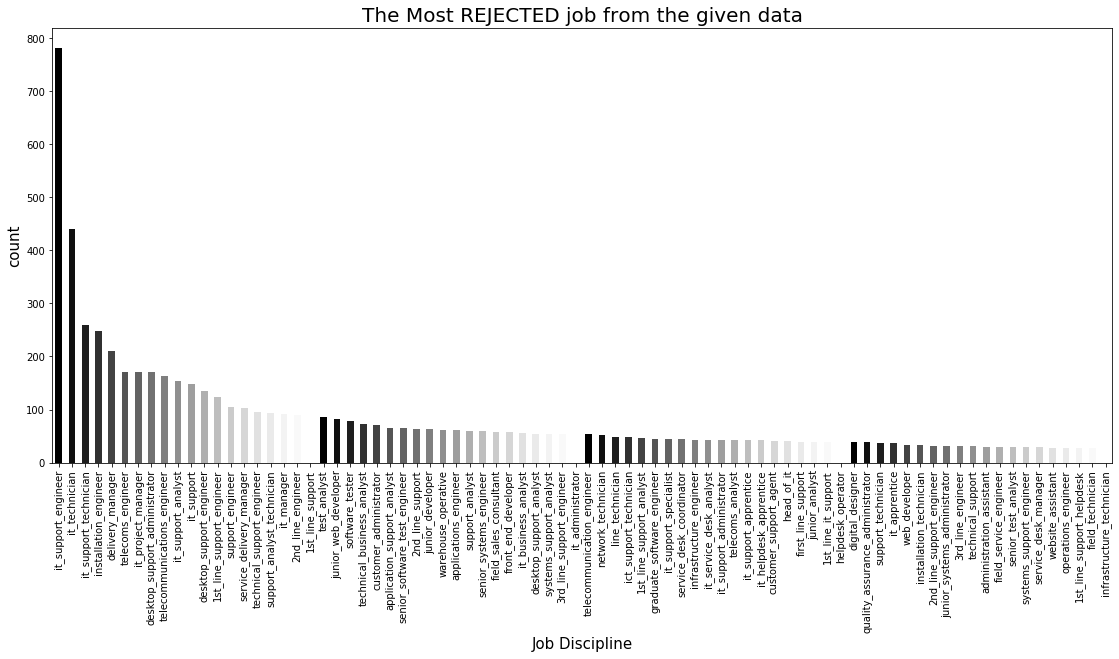

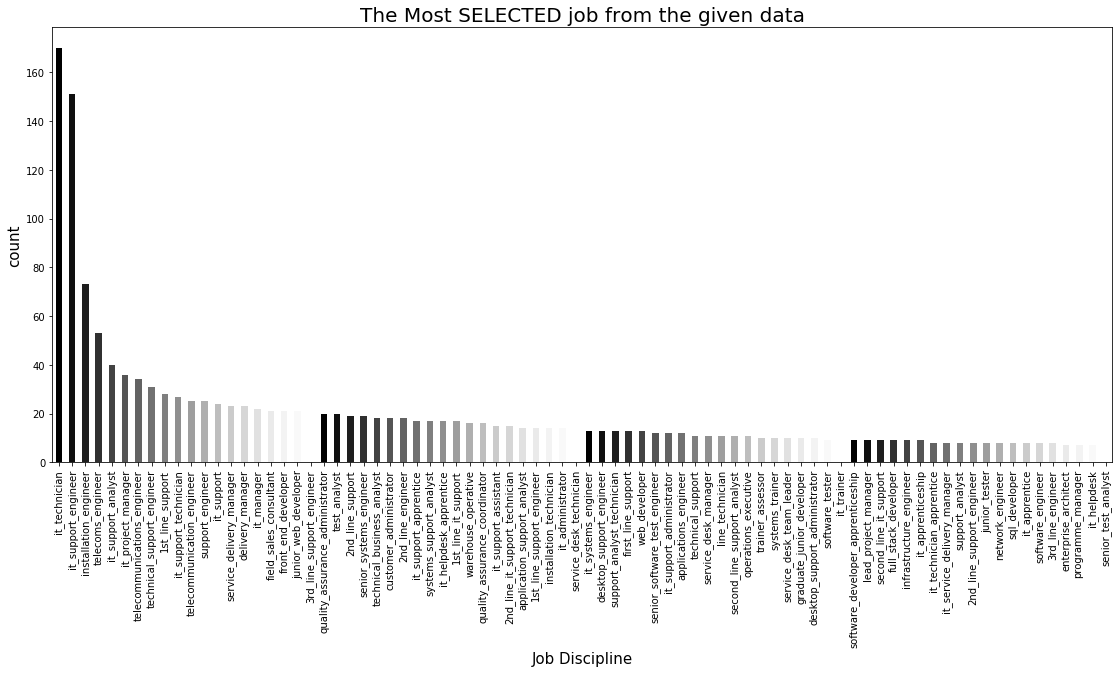

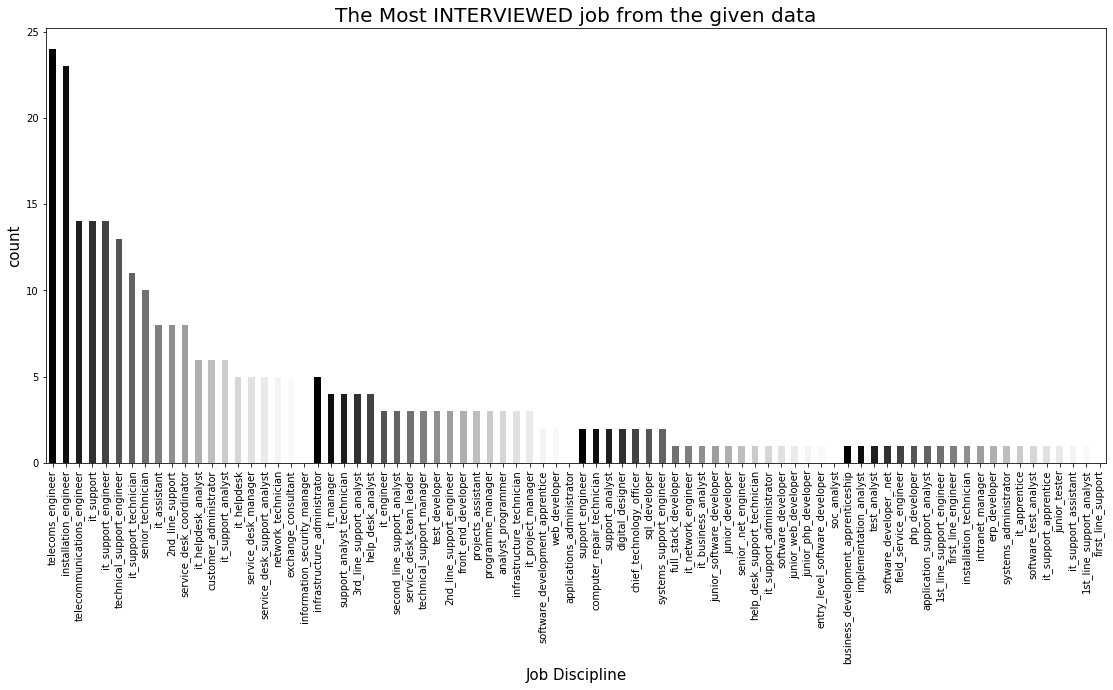

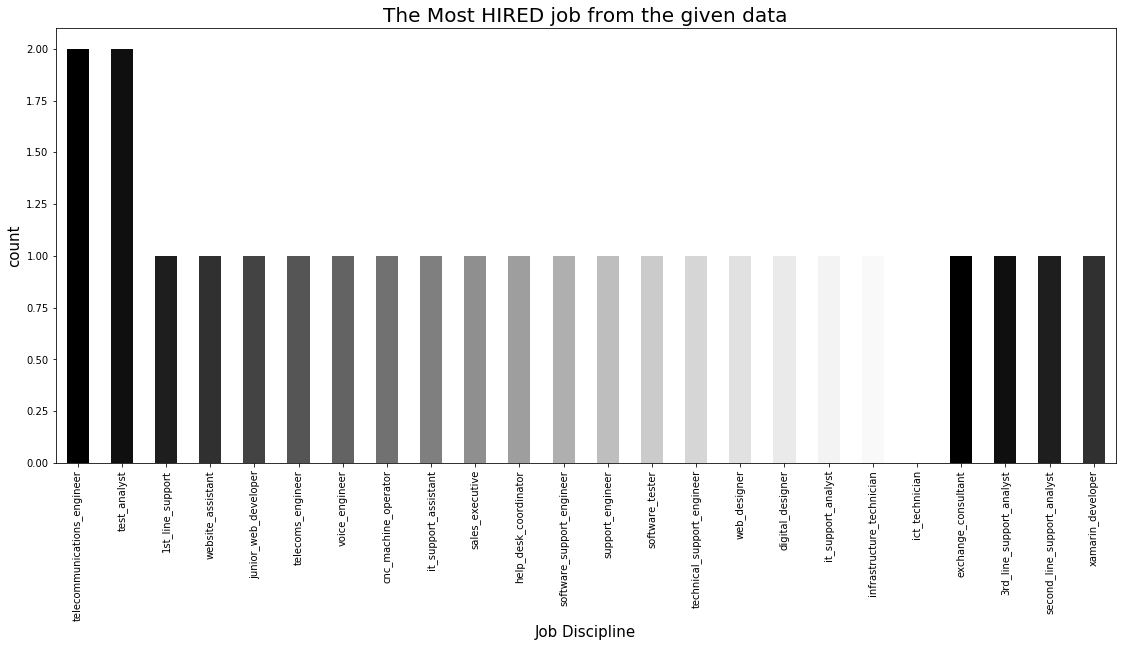

In [0]:
for i in range(len(data_ats)):
  df2=pd.DataFrame(job_list[i],columns =['Job_title'])
  
  plt.rcParams['figure.figsize'] = (19, 8)

  color = plt.cm.Greys_r(np.linspace(0, 1, 20))
  df2['Job_title'].value_counts().head(80).sort_values(ascending = False).plot.bar(color =color)
  plt.title("The Most {} job from the given data".format(data_ats_name[i]), fontsize = 20)
  plt.xlabel('Job Discipline', fontsize = 15)
  plt.ylabel('count', fontsize = 15)
  plt.show()


In [0]:
data['CV_Experience_0_Summary']

0        capgemini defect manager months defect manager...
1        south staffordshire plc july march senior serv...
2        october present bimm british irish modern musi...
3        dhl supply chain administration clerk dec oct ...
4        vodafone daisy fixed faults analyst ive experi...
                               ...                        
11708    aug present senior service desk analyst nelcsu...
11709    newham council npw network manager provision n...
11710    december present support engineer claygate dit...
11711    newham general hospital sept november cerner m...
11712    present real asset management application supp...
Name: CV_Experience_0_Summary, Length: 11713, dtype: object

In [0]:
data['ATS_Status']

0        R
1        R
2        S
3        R
4        R
        ..
11708    R
11709    R
11710    R
11711    R
11712    S
Name: ATS_Status, Length: 11713, dtype: object

In [0]:
import string


In [0]:
#lower caseing the setencing
data['CV_Experience_0_Summary']=data['CV_Experience_0_Summary'].str.lower()

In [0]:
#preprocessing
table = str.maketrans('', '', string.punctuation)
data['CV_Experience_0_Summary'] = [data['CV_Experience_0_Summary'][row].translate(table) for row in range(len(data['CV_Experience_0_Summary']))]

In [0]:
#performing the basic nlp procedures
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
#removing the stopwords and preprocessing
data['CV_Experience_0_Summary'] = data['CV_Experience_0_Summary'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [0]:
#computing the frequenecy for the most common words
freq_d = pd.Series(''.join(data['CV_Experience_0_Summary']).split()).value_counts()

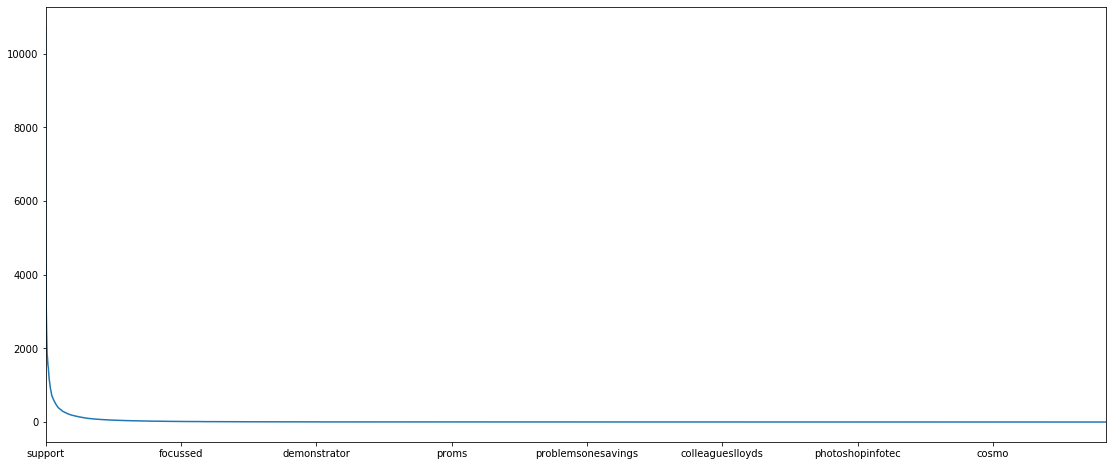

In [0]:
freq_d.plot(kind='line', ax=None, figsize=None, use_index=True,
            title=None, grid=None, legend=False, style=None,
            logx=False, logy=False, loglog=False, xticks=None,
            yticks=None, xlim=None, ylim=None, rot=None,
            fontsize=None, colormap=None, table=False, yerr=None,
            xerr=None, label=None, secondary_y=False)

In [0]:
#Remove the least frequent words
rare_d = pd.Series(' '.join(data['CV_Experience_0_Summary']).split()).value_counts()[-17528:]

In [0]:
rare_d = list(rare_d.index)

In [0]:
data['CV_Experience_0_Summary'] = data['CV_Experience_0_Summary'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_d))

In [0]:
#Remove the most frequent words
freq_d = pd.Series(' '.join(data['CV_Experience_0_Summary']).split()).value_counts()[:30]

In [0]:
freq_d = list(freq_d.index)
data['CV_Experience_0_Summary'] = data['CV_Experience_0_Summary'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_d))

In [0]:
data['CV_Experience_0_Summary'] = [text.split() for text in data['CV_Experience_0_Summary']]

In [0]:
#creating dictinoray
from gensim import corpora
dict_d = corpora.Dictionary(data['CV_Experience_0_Summary'])

In [0]:
corpus_d = [dict_d.doc2bow(line) for line in data['CV_Experience_0_Summary']]

In [0]:
from numpy import linalg as LA
corpus_d_vec_norm = [LA.norm(vec) for vec in corpus_d]
#Replace text descriptions in the database with norms of vectors
data['CV_Experience_0_Summary'] = corpus_d_vec_norm

In [0]:
dict_d

In [0]:
data['CV_Experience_0_Summary']

0           93.064494
1          628.265867
2          718.197744
3          937.272639
4         1869.196619
             ...     
11708    10096.227117
11709    11855.398138
11710    16669.160117
11711    34646.819392
11712    16123.592032
Name: CV_Experience_0_Summary, Length: 11713, dtype: float64

In [0]:
corpus_d_vec_norm

[93.06449376641986,
 628.2658672886822,
 718.1977443573601,
 937.2726390970772,
 1869.1966188713268,
 1735.4123429317885,
 777.8733830129426,
 2752.8098372390346,
 3215.6938598069314,
 2613.820766617329,
 1685.5278105092184,
 2432.1091669577663,
 6912.031611617528,
 2434.4373066480885,
 1359.5068959001273,
 4738.8304464287385,
 4640.128446498006,
 3568.835664470977,
 3187.0778151780355,
 4088.776100497556,
 1592.343241892275,
 1770.6281371310013,
 4467.269412068182,
 5065.312724797946,
 4546.077320063969,
 5108.182357747225,
 5441.461935913914,
 3605.5634788476546,
 6270.7754703864175,
 12644.42410709163,
 4874.296564633712,
 6036.399506328255,
 4350.26734810632,
 5727.846017483361,
 6361.498879981038,
 4451.1264866323445,
 4097.6640906741,
 4171.111722310971,
 3608.6238374205755,
 9228.801764042828,
 1474.093959013468,
 7778.292293299346,
 4212.24560062682,
 4813.48096495665,
 6984.576436692493,
 10640.832157308,
 10253.654324190962,
 3274.618603746091,
 3925.89098167537,
 10697.90741

In [0]:
df3=pd.read_csv("/content/gdrive/My Drive/NLP Case Study/CASE_DATA.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (292,294,296,299,300,301,304,305,306,309,310,311,376,377,378,387,392,394,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,429,431,433,451,452,453,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,522,524,526,527,528,529,530,531,532,542,543,544,545,546,547,548,549,550,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693

In [0]:
lic=df3['Listing_Content']

In [0]:
#computing the ats predictive model
X=df3['CV_Experience_0_Summary']
y=df3['ATS_Status']

In [0]:
#loading dependcies

import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [0]:
all_score2 = nltk.FreqDist(lic) 

In [0]:
all_score = nltk.FreqDist(y) 

In [0]:
all_score_df = pd.DataFrame({'score': list(all_score.keys()), 
                              'Count': list(all_score.values())})
all_score_df2 = pd.DataFrame({'score': list(all_score2.keys()), 
                              'Count': list(all_score2.values())})

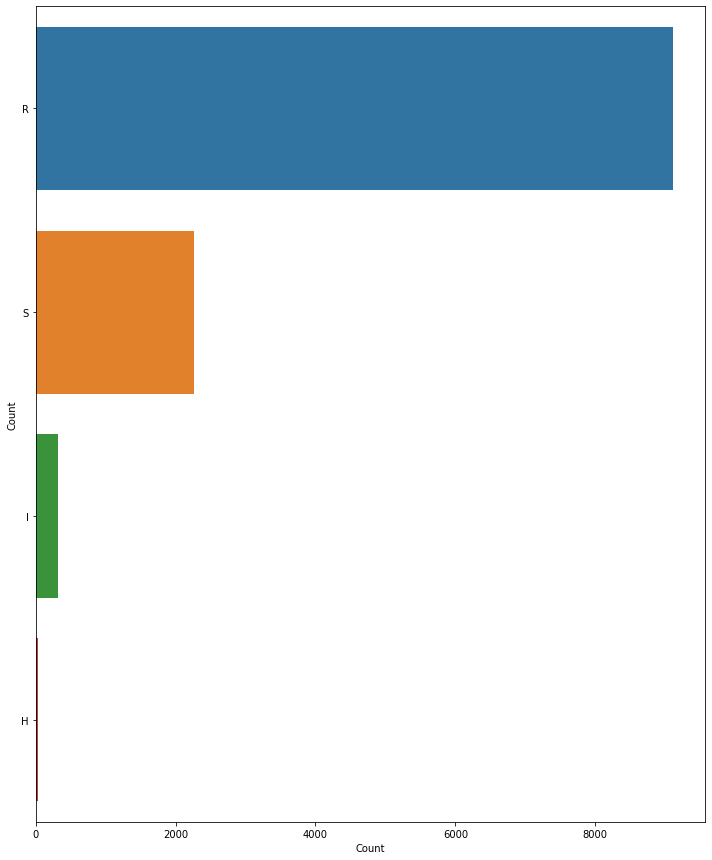

In [0]:
g = all_score_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "score") 
ax.set(ylabel = 'Count') 
plt.show()

In [0]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [0]:
df3['CV_Experience_0_Summary'] = df3['CV_Experience_0_Summary'].apply(lambda x: clean_text(x))

In [0]:
df3['Listing_Content'] = df3['Listing_Content'].apply(lambda x: clean_text(x))

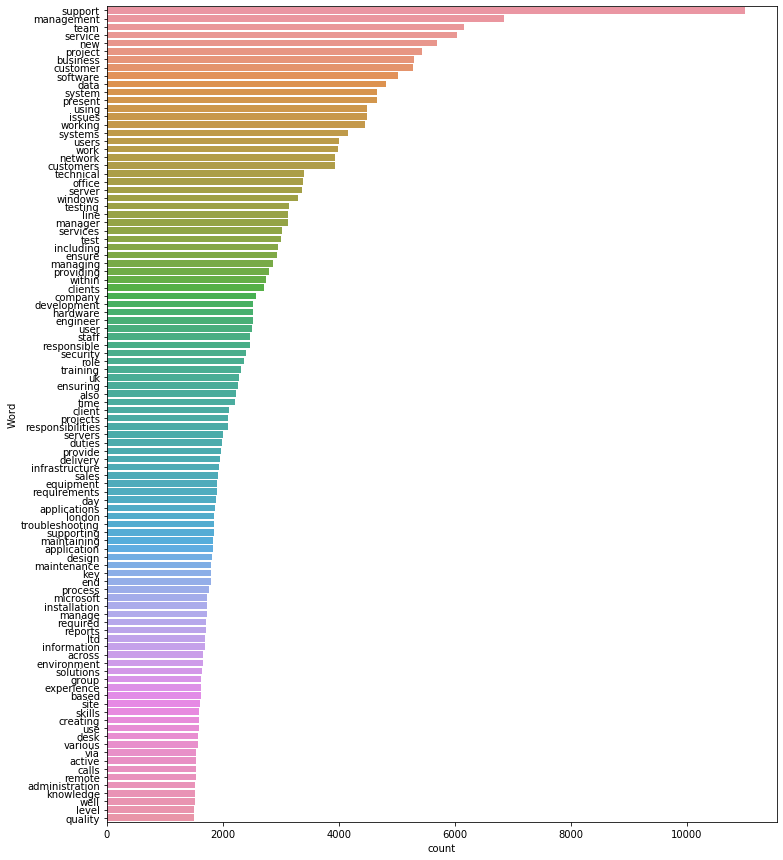

In [0]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(df3['CV_Experience_0_Summary'], 100)

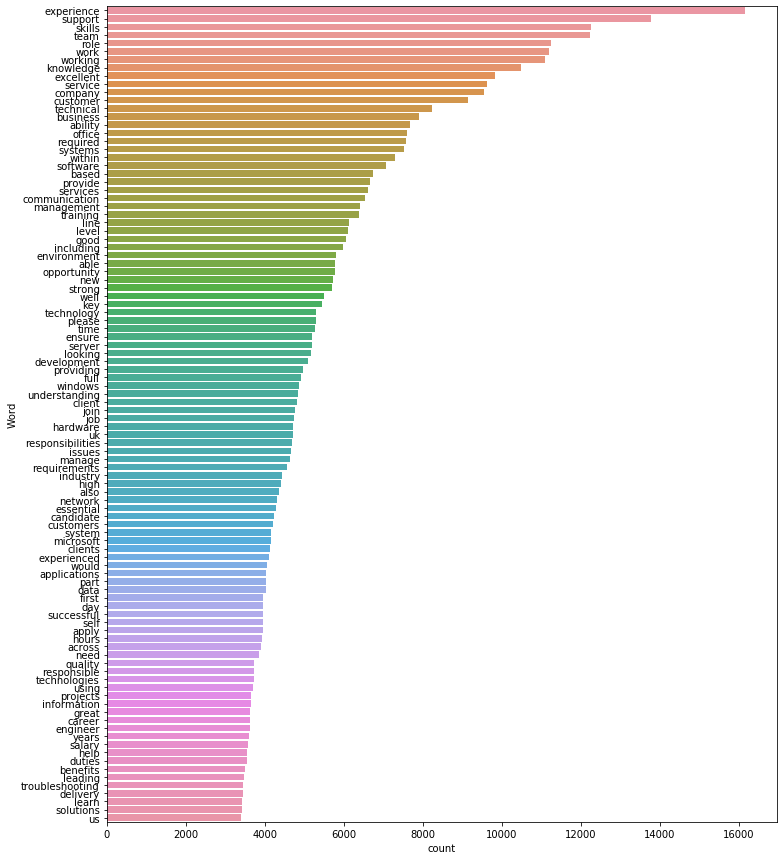

In [0]:
# print 100 most frequent words 
freq_words(df3['Listing_Content'], 100)

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df3['CV_Experience_0_Summary'] = df3['CV_Experience_0_Summary'].apply(lambda x: remove_stopwords(x))

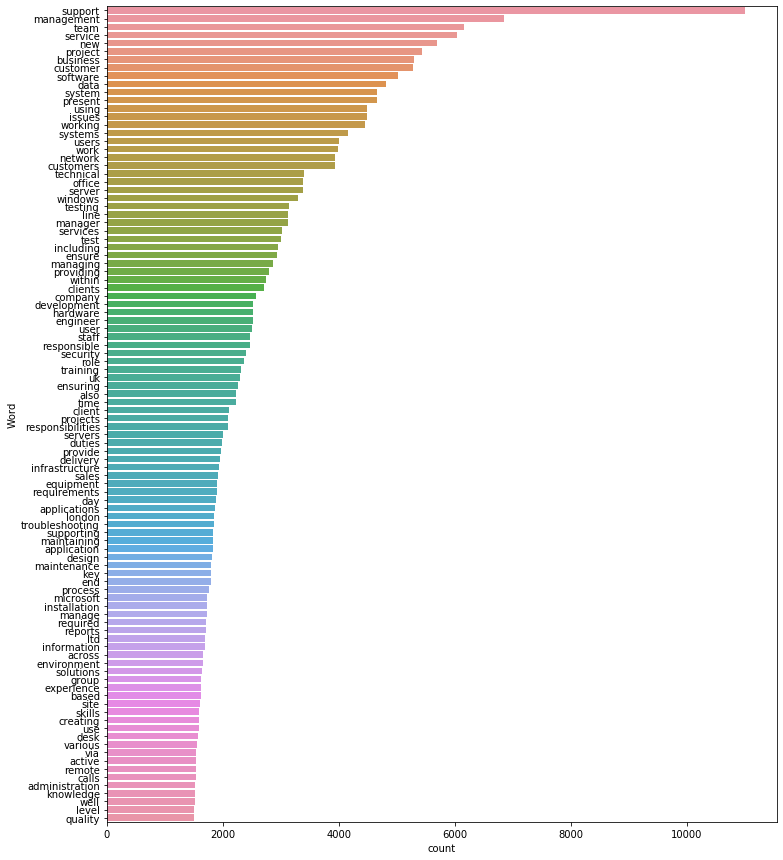

In [0]:
freq_words(df3['CV_Experience_0_Summary'], 100)

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df3['ATS_Status'])

# transform target variable
y = multilabel_binarizer.transform(df3['ATS_Status'])

In [0]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [0]:

xtrain, xval, ytrain, yval = train_test_split(df3['CV_Experience_0_Summary'], y, test_size=0.2, random_state=9)

In [0]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [0]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [0]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [0]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred[3]

array([0, 0, 1, 0])

In [0]:
yval

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [0]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('R',)

In [0]:
accuracy=accuracy_score(yval,y_pred)

In [0]:
accuracy

0.7776355100298762

In [0]:
f1_score(yval, y_pred, average="micro")

0.7824034334763948

In [0]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [0]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [0]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.7768628238602128

In [0]:
import tensorflow as tf
import tensorflow_hub as hub

# Create graph and finalize (finalizing optional but recommended).
g = tf.Graph()
with g.as_default():
  # We will be feeding 1D tensors of text into the graph.
  text_input = tf.placeholder(dtype=tf.string, shape=[None])
  embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder/2")
  embedded_text = embed(text_input)
  init_op = tf.group([tf.global_variables_initializer(), tf.tables_initializer()])
g.finalize()

# Create session and initialize.
session = tf.Session(graph=g)
session.run(init_op)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [0]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(result1, result2))

[[1.0000002]]


In [0]:
def compute_similarty(df1,df2):
  from sklearn.metrics.pairwise import cosine_similarity
  result1 = session.run(embedded_text, feed_dict={text_input: [df1]})
  result2= session.run(embedded_text, feed_dict={text_input: [df2]})
  return cosine_similarity(result1, result2)



In [0]:
compute_similarty(data['CV_Experience_0_Summary'][0],data['CV_Experience_0_Summary'][0])

array([[0.9999999]], dtype=float32)

In [0]:
compute_similarty(data['Listing_Content'][0],data['Listing_Content'][6000])

array([[0.85067135]], dtype=float32)

In [0]:
data.head()

,Unnamed: 0,Listing_ID,Candidate_ID,Listing_Content,ATS_Status,Listing_Longitude,Listing_Latitude,Candidate_Longitude,Candidate_Latitude,Listing_Jobtitle_0_Title,Listing_Jobtitle_0_Discipline,Listing_Jobtitle_0_Subdiscipline,CV_Experience_0_Title_0,CV_Experience_0_Current,CV_Experience_0_Startdate,CV_Experience_0_Enddate,CV_Experience_0_Discipline_0,CV_Experience_0_Subdiscipline_0,CV_Experience_0_Summary,CV_Experience_1_Title_0,CV_Experience_1_Current,CV_Experience_1_Startdate,CV_Experience_1_Enddate,CV_Experience_1_Discipline_0,CV_Experience_1_Subdiscipline_0,CV_Experience_1_Summary,CV_Experience_2_Title_0,CV_Experience_2_Current,CV_Experience_2_Startdate,CV_Experience_2_Enddate,CV_Experience_2_Discipline_0,CV_Experience_2_Subdiscipline_0,CV_Experience_2_Summary,CV_Experience_3_Title_0,CV_Experience_3_Current,CV_Experience_3_Startdate,CV_Experience_3_Enddate,CV_Experience_3_Discipline_0,CV_Experience_3_Subdiscipline_0,CV_Experience_3_Summary,...,CV_Experience_8_Title_5,CV_Experience_8_Title_6,CV_Experience_8_Discipline_5,CV_Experience_8_Discipline_6,CV_Experience_8_Subdiscipline_5,CV_Experience_8_Subdiscipline_6,CV_Experience_23_Title_1,CV_Experience_23_Discipline_1,CV_Experience_23_Subdiscipline_1,CV_Experience_10_Title_5,CV_Experience_10_Discipline_5,CV_Experience_10_Subdiscipline_5,CV_Experience_7_Title_7,CV_Experience_7_Title_8,CV_Experience_7_Title_9,CV_Experience_7_Title_10,CV_Experience_7_Discipline_7,CV_Experience_7_Discipline_8,CV_Experience_7_Discipline_9,CV_Experience_7_Discipline_10,CV_Experience_7_Subdiscipline_7,CV_Experience_7_Subdiscipline_8,CV_Experience_7_Subdiscipline_9,CV_Experience_7_Subdiscipline_10,CV_Experience_12_Title_5,CV_Experience_12_Discipline_5,CV_Experience_12_Subdiscipline_5,CV_Experience_9_Title_7,CV_Experience_9_Discipline_7,CV_Experience_9_Subdiscipline_7,CV_Experience_9_Title_8,CV_Experience_9_Title_9,CV_Experience_9_Discipline_8,CV_Experience_9_Discipline_9,CV_Experience_9_Subdiscipline_8,CV_Experience_9_Subdiscipline_9,Distance_between_Jobs_Cand,Job_location,Candidate_Location,Experience
0,0,00250608015BFE1CA028A1D6268179E2108E96CA8C1785...,12A643CFAB1ABD612796BAEEE9EAF2765C796898BC599C...,role due continued rapid growth recruited one ...,R,-1.86569,52.46289,-2.45707,52.68035,it_support_engineer,it,support,defect_manager,True,2011-01-01,2017-12-08 13:21:53.717,management,technical,capgemini defect manager months defect manager...,software_engineer,False,2011-01-01 00:00:00.000000,2016-12-31 00:00:00.000000,it,software_development,capgemini software engineer role software engi...,reporting_analyst,False,2006-01-01 00:00:00.000000,2011-01-01 00:00:00.000000,consulting,analysis,capgemini reporting analyst reporting analyst ...,incident_manager,False,2005-01-01 00:00:00.000000,2006-01-01 00:00:00.000000,management,operational,capgemini incident manager incident manager ro...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3607.895791,Birmingham,Telford,6.93664
1,1,00250608015BFE1CA028A1D6268179E2108E96CA8C1785...,15A4CE628F6146B9AF9DBB33B300B8ADE0D01612488AC7...,role due continued rapid growth recruited one ...,R,-1.86569,52.46289,-1.86569,52.46289,it_support_engineer,it,support,senior_service_desk_analyst,False,2015-07-01,2018-03-31 00:00:00.000,NaN,NaN,south staffordshire plc july march senior serv...,it_technician,False,2009-09-01 00:00:00.000000,2015-07-01 00:00:00.000000,it,support,george dixon international secondary school se...,it_support_analyst,False,2007-03-01 00:00:00.000000,2009-07-31 00:00:00.000000,it,support,serco march july support analyst software inci...,change_analyst,False,2005-12-01 00:00:00.000000,2007-02-28 00:00:00.000000,consulting,analysis,capgemini december feb change analyst working ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3603.305706,Birmingham,Birmingham

In [94]:
data=data.fillna(0)

Index(['Unnamed: 0', 'Listing_ID', 'Candidate_ID', 'Listing_Content',
       'ATS_Status', 'Listing_Longitude', 'Listing_Latitude',
       'Candidate_Longitude', 'Candidate_Latitude', 'Listing_Jobtitle_0_Title',
       ...
       'CV_Experience_9_Title_8', 'CV_Experience_9_Title_9',
       'CV_Experience_9_Discipline_8', 'CV_Experience_9_Discipline_9',
       'CV_Experience_9_Subdiscipline_8', 'CV_Experience_9_Subdiscipline_9',
       'Distance_between_Jobs_Cand', 'Job_location', 'Candidate_Location',
       'Experience'],
      dtype='object', length=1026)

In [95]:
data['Listing_Skills_0']

0                managing
1                managing
2                managing
3                managing
4                managing
               ...       
11708    asset management
11709    asset management
11710    asset management
11711    asset management
11712    asset management
Name: Listing_Skills_0, Length: 11713, dtype: object

In [0]:
def top_skills(job_title):
  skills=[]
  flag=0
  for i in range(len(data)):
    if job_title == data['Listing_Jobtitle_0_Title'][i]:
      flag=1
      for k in range(0,72):
        a='Listing_Skills_'+str(k)
        if data[str(a)][i]==0:
          break
        else :
          skills.append(data[a][i])
      if flag==1:
        break 
  return skills


In [159]:
top_skills('it_support_engineer')

['managing',
 'monitoring',
 'knowledge base',
 'customer service',
 'training',
 'interpersonal skill',
 'support',
 'research',
 'recruitment']

In [150]:
data['Listing_Jobtitle_0_Title'].value_counts().head(30)

it_support_engineer              946
it_technician                    611
installation_engineer            345
it_support_technician            297
telecoms_engineer                248
delivery_manager                 234
telecommunications_engineer      213
it_project_manager               209
it_support_analyst               201
it_support                       186
desktop_support_administrator    180
desktop_support_engineer         147
technical_support_engineer       140
1st_line_support_engineer        138
support_engineer                 133
service_delivery_manager         126
1st_line_support                 118
it_manager                       118
support_analyst_technician       111
2nd_line_engineer                108
test_analyst                     108
junior_web_developer             105
customer_administrator            94
2nd_line_support                  90
technical_business_analyst        90
software_tester                   88
front_end_developer               81
a

In [0]:
most_frequent_job=['it_support_engineer','it_technician','installation_engineer','it_support_technician','telecoms_engineer','delivery_manager','telecommunications_engineer','it_project_manager','it_support_analyst',
                   'it_support','desktop_support_administrator','desktop_support_engineer','technical_support_engineer','1st_line_support_engineer','support_engineer','service_delivery_manager','1st_line_support','it_manager']

In [165]:
for i in most_frequent_job:
  print("The most Required Skills for {} :". format(i))
  for j in top_skills(i):
    print(j)
  print("\n")

The most Required Skills for it_support_engineer :
managing
monitoring
knowledge base
customer service
training
interpersonal skill
support
research
recruitment


The most Required Skills for it_technician :
history
technology
android
spyware
sms
troubleshooting
preparation
vat
flexibility
admin
hardware
credit
back office
business
english
smartphone
support


The most Required Skills for installation_engineer :
vehicles
driving license
driving


The most Required Skills for it_support_technician :
system documentation
sharepoint
methodology
controls
active directory
windows 10
avaya
dhcp
infrastructure
business strategy
windows 7
ibm domino
application software
windows
windows 8
project delivery
netapp
disaster recovery
guidance
childcare
dns
wireless networking
storage
business
telephony
dell
security
operating systems
office 365
microsoft office
lan
routing
support
compliance


The most Required Skills for telecoms_engineer :
driving license
driving


The most Required Skills for de